In [3]:
import kagglehub
from sqlalchemy import create_engine, String, Integer, BigInteger, Column, Float, insert, select, update,delete, func, DateTime, func, ForeignKey
from sqlalchemy.orm import sessionmaker, declarative_base, relationship
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from datetime import datetime

In [4]:
import os
import pandas as pd
from sqlalchemy import create_engine
import zipfile

# Step 1: Download the dataset
!kaggle datasets download -d ishanshrivastava28/superstore-sales

# Step 2: Extract the downloaded zip file
with zipfile.ZipFile('superstore-sales.zip', 'r') as zip_ref:
    zip_ref.extractall('superstore_data')  # Extract to a specific folder

# Step 3: Check the current working directory
print("Current Working Directory:", os.getcwd())

# Step 4: Load the dataset into a DataFrame
df = pd.read_excel('superstore_data/Superstore.xlsx')  # Adjust the path as needed

# Step 5: Create a connection to the MySQL database
username = 'root'
password = '*************'
host = '127.0.0.1'
port = '3306'
database = 'consumer_analysis'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}', echo=True)

# Step 6: Store the DataFrame into the MySQL database
df.to_sql('superstore', con=engine, if_exists='replace', index=False)

# Step 7: Clean up by disposing of the engine
engine.dispose()

Dataset URL: https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales
License(s): DbCL-1.0
superstore-sales.zip: Skipping, found more recently modified local copy (use --force to force download)
Current Working Directory: C:\Users\hosin
2025-02-19 19:57:19,082 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2025-02-19 19:57:19,082 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-02-19 19:57:19,082 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2025-02-19 19:57:19,082 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-02-19 19:57:19,082 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2025-02-19 19:57:19,082 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-02-19 19:57:19,082 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-19 19:57:19,101 INFO sqlalchemy.engine.Engine DESCRIBE `consumer_analysis`.`superstore`
2025-02-19 19:57:19,102 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-02-19 19:57:19,108 INFO sqlalchemy.engine.Engine DESCRIBE `consumer_analysis`.`sup

In [6]:
Base = declarative_base()

class Superstore(Base):
    __tablename__ = 'superstore'

    row_id = Column('Row ID', BigInteger, primary_key = True, autoincrement = True)
    order_id = Column('Order ID', String(50))
    order_date = Column('Order Date', DateTime)
    ship_date = Column('Ship Date', DateTime)
    ship_mode = Column('Ship Mode', String(50))
    customer_id = Column('Customer ID', String(50))
    customer_name = Column('Customer Name', String(50))
    segment = Column('Segment', String(50))
    country = Column('Country', String(50))
    city = Column('City', String(50))
    state = Column('State', String(50))
    postal_code = Column('Postal Code', BigInteger)
    region = Column('Region', String(50))
    product_id = Column('Product ID', String(50))
    category = Column('Category', String(50))
    sub_category = Column('Sub-Category', String(50))
    product_name = Column('Product Name', String(200))
    sales = Column('Sales', Integer)
    quantity = Column('Quantity', BigInteger)
    discount = Column('Discount', Integer)
    profit = Column('Profit', Integer)

    def __repr__(self):
        return (f"<Superstore(order_id='{self.order_id}', "
                f"order_date='{self.order_date}', "
                f"customer_name='{self.customer_name}', "
                f"sales={self.sales}, "
                f"profit={self.profit})>")
#
                                 
class ProductPrice(Base):
    __tablename__ = 'product_prices'

    row_id = Column(Integer, primary_key = True, autoincrement = True)
    product_id = Column(String(200))
    product_categories = Column(String(50))
    product_sub_categories = Column(String(50))
    price = Column(Float)

#

Session = sessionmaker(bind = engine)
session = Session()


ProductPrice.__table__.drop(bind=engine, checkfirst=True)

ProductPrice.__table__.create(bind=engine, checkfirst=True)



2025-02-19 19:57:20,384 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-19 19:57:20,385 INFO sqlalchemy.engine.Engine DESCRIBE `consumer_analysis`.`product_prices`
2025-02-19 19:57:20,386 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-02-19 19:57:20,391 INFO sqlalchemy.engine.Engine 
DROP TABLE product_prices
2025-02-19 19:57:20,391 INFO sqlalchemy.engine.Engine [no key 0.00058s] {}
2025-02-19 19:57:20,405 INFO sqlalchemy.engine.Engine COMMIT
2025-02-19 19:57:20,407 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-19 19:57:20,408 INFO sqlalchemy.engine.Engine DESCRIBE `consumer_analysis`.`product_prices`
2025-02-19 19:57:20,409 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-02-19 19:57:20,411 INFO sqlalchemy.engine.Engine 
CREATE TABLE product_prices (
	row_id INTEGER NOT NULL AUTO_INCREMENT, 
	product_id VARCHAR(200), 
	product_categories VARCHAR(50), 
	product_sub_categories VARCHAR(50), 
	price FLOAT, 
	PRIMARY KEY (row_id)
)


2025-02-19 19:57:20,412 INFO sqlalchemy.

In [8]:
a = session.query(Superstore).filter(Superstore.profit > 10).all()

cnt = session.query(Superstore).filter(Superstore.profit > 10).count()

print(cnt)

2025-02-19 19:57:20,473 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-19 19:57:20,473 INFO sqlalchemy.engine.Engine SELECT superstore.`Row ID` AS `superstore_Row ID`, superstore.`Order ID` AS `superstore_Order ID`, superstore.`Order Date` AS `superstore_Order Date`, superstore.`Ship Date` AS `superstore_Ship Date`, superstore.`Ship Mode` AS `superstore_Ship Mode`, superstore.`Customer ID` AS `superstore_Customer ID`, superstore.`Customer Name` AS `superstore_Customer Name`, superstore.`Segment` AS `superstore_Segment`, superstore.`Country` AS `superstore_Country`, superstore.`City` AS `superstore_City`, superstore.`State` AS `superstore_State`, superstore.`Postal Code` AS `superstore_Postal Code`, superstore.`Region` AS `superstore_Region`, superstore.`Product ID` AS `superstore_Product ID`, superstore.`Category` AS `superstore_Category`, superstore.`Sub-Category` AS `superstore_Sub-Category`, superstore.`Product Name` AS `superstore_Product Name`, superstore.`Sales` AS `super

In [9]:
#yearly_sales

a = session.query(
    func.year(Superstore.order_date).label('year'),
    func.sum(Superstore.sales).label('total_sales')
).group_by(
    func.year(Superstore.order_date)
).all()


for row in a:
    print(row.year, row.total_sales)

2025-02-19 19:57:20,782 INFO sqlalchemy.engine.Engine SELECT year(superstore.`Order Date`) AS year, sum(superstore.`Sales`) AS total_sales 
FROM superstore GROUP BY year(superstore.`Order Date`)
2025-02-19 19:57:20,783 INFO sqlalchemy.engine.Engine [generated in 0.00138s] {}
2013 608473.8300000007
2012 470532.50899999985
2011 484247.49810000096
2014 733947.0231999997


In [14]:
# add new record



record = Superstore(order_id='CA-2013-152156')
record_2 = Superstore(order_id='CA-2014-121258', order_date='2014-02-27',
                      ship_date='2014-03-04', ship_mode='Standard Class',
                      customer_id='DB-13060', customer_name='Dave Brooks',
                      segment='Consumer', country='United States', city='Costa Mesa',
                      state='California', postal_code=92627, region='West',
                      product_name='Tenex B1-RE Series Chair Mats for Low Pile Carpets')

session.add_all([record, record_2])
session.commit()



2025-02-19 19:57:30,833 INFO sqlalchemy.engine.Engine INSERT INTO superstore (`Order ID`, `Order Date`, `Ship Date`, `Ship Mode`, `Customer ID`, `Customer Name`, `Segment`, `Country`, `City`, `State`, `Postal Code`, `Region`, `Product ID`, `Category`, `Sub-Category`, `Product Name`, `Sales`, `Quantity`, `Discount`, `Profit`) VALUES (%(Order_ID)s, %(Order_Date)s, %(Ship_Date)s, %(Ship_Mode)s, %(Customer_ID)s, %(Customer_Name)s, %(Segment)s, %(Country)s, %(City)s, %(State)s, %(Postal_Code)s, %(Region)s, %(Product_ID)s, %(Category)s, %(Sub-Category)s, %(Product_Name)s, %(Sales)s, %(Quantity)s, %(Discount)s, %(Profit)s)
2025-02-19 19:57:30,835 INFO sqlalchemy.engine.Engine [generated in 0.00195s] {'Order_ID': 'CA-2013-152156', 'Order_Date': None, 'Ship_Date': None, 'Ship_Mode': None, 'Customer_ID': None, 'Customer_Name': None, 'Segment': None, 'Country': None, 'City': None, 'State': None, 'Postal_Code': None, 'Region': None, 'Product_ID': None, 'Category': None, 'Sub-Category': None, 'Prod

C:\Users\hosin\AppData\Local\Temp\ipykernel_1140\1881770888.py:14: SAWarning: Identity map already had an identity for (<class '__main__.Superstore'>, (0,), None), replacing it with newly flushed object.   Are there load operations occurring inside of an event handler within the flush?
  session.commit()


In [16]:

b = session.query(Superstore).filter(Superstore.order_id == 'CA-2013-152156').all()
for row in b:
    print(row)

2025-02-19 19:57:34,176 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-19 19:57:34,178 INFO sqlalchemy.engine.Engine SELECT superstore.`Row ID` AS `superstore_Row ID`, superstore.`Order ID` AS `superstore_Order ID`, superstore.`Order Date` AS `superstore_Order Date`, superstore.`Ship Date` AS `superstore_Ship Date`, superstore.`Ship Mode` AS `superstore_Ship Mode`, superstore.`Customer ID` AS `superstore_Customer ID`, superstore.`Customer Name` AS `superstore_Customer Name`, superstore.`Segment` AS `superstore_Segment`, superstore.`Country` AS `superstore_Country`, superstore.`City` AS `superstore_City`, superstore.`State` AS `superstore_State`, superstore.`Postal Code` AS `superstore_Postal Code`, superstore.`Region` AS `superstore_Region`, superstore.`Product ID` AS `superstore_Product ID`, superstore.`Category` AS `superstore_Category`, superstore.`Sub-Category` AS `superstore_Sub-Category`, superstore.`Product Name` AS `superstore_Product Name`, superstore.`Sales` AS `super

In [18]:
product_avg_price = session.query(
    Superstore.product_id,
    Superstore.category,
    Superstore.sub_category,
    func.round(func.avg(Superstore.sales / Superstore.quantity), 3).label('avg_price')
).group_by(
    Superstore.product_id,
    Superstore.category,
    Superstore.sub_category
).all()

for row in product_avg_price:
    print(row.product_id, row.category, row.sub_category, row.avg_price)


                                    
                    

2025-02-19 19:57:36,577 INFO sqlalchemy.engine.Engine SELECT superstore.`Product ID` AS `superstore_Product ID`, superstore.`Category` AS `superstore_Category`, superstore.`Sub-Category` AS `superstore_Sub-Category`, round(avg(superstore.`Sales` / superstore.`Quantity`), %(round_1)s) AS avg_price 
FROM superstore GROUP BY superstore.`Product ID`, superstore.`Category`, superstore.`Sub-Category`
2025-02-19 19:57:36,578 INFO sqlalchemy.engine.Engine [generated in 0.00124s] {'round_1': 3}
FUR-BO-10001798 Furniture Bookcases 103.147
FUR-CH-10000454 Furniture Chairs 209.416
OFF-LA-10000240 Office Supplies Labels 6.683
FUR-TA-10000577 Furniture Tables 256.805
OFF-ST-10000760 Office Supplies Storage 12.302
FUR-FU-10001487 Furniture Furnishings 6.98
OFF-AR-10002833 Office Supplies Art 1.699
TEC-PH-10002275 Technology Phones 151.192
OFF-BI-10003910 Office Supplies Binders 5.86
OFF-AP-10002892 Office Supplies Appliances 21.667
FUR-TA-10001539 Furniture Tables 160.613
TEC-PH-10002033 Technology P

In [ ]:
for row in product_avg_price: 
    price_list_entry = ProductPrice( product_id = row.product_id,
                                    product_categories = row.category,
                                    product_sub_categories = row.sub_category,
                                    price = row.avg_price
                                   )
    session.add(price_list_entry)

session.commit()

2025-02-19 19:57:39,578 INFO sqlalchemy.engine.Engine INSERT INTO product_prices (product_id, product_categories, product_sub_categories, price) VALUES (%(product_id)s, %(product_categories)s, %(product_sub_categories)s, %(price)s)
2025-02-19 19:57:39,580 INFO sqlalchemy.engine.Engine [generated in 0.00128s] {'product_id': 'FUR-BO-10001798', 'product_categories': 'Furniture', 'product_sub_categories': 'Bookcases', 'price': 103.147}
2025-02-19 19:57:39,584 INFO sqlalchemy.engine.Engine INSERT INTO product_prices (product_id, product_categories, product_sub_categories, price) VALUES (%(product_id)s, %(product_categories)s, %(product_sub_categories)s, %(price)s)
2025-02-19 19:57:39,585 INFO sqlalchemy.engine.Engine [cached since 0.006157s ago] {'product_id': 'FUR-CH-10000454', 'product_categories': 'Furniture', 'product_sub_categories': 'Chairs', 'price': 209.416}
2025-02-19 19:57:39,586 INFO sqlalchemy.engine.Engine INSERT INTO product_prices (product_id, product_categories, product_sub_

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [21]:
#modifying 
session.query(Superstore).filter(Superstore.order_id == 'CA-2013-152156', Superstore.customer_name.is_(None)).update({'customer_name': 'Claire Gute'})
session.commit()

2025-02-19 20:00:47,296 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-19 20:00:47,299 INFO sqlalchemy.engine.Engine UPDATE superstore SET `Customer Name`=%(Customer_Name)s WHERE superstore.`Order ID` = %(Order_ID_1)s AND superstore.`Customer Name` IS NULL
2025-02-19 20:00:47,301 INFO sqlalchemy.engine.Engine [generated in 0.00142s] {'Customer_Name': 'Claire Gute', 'Order_ID_1': 'CA-2013-152156'}
2025-02-19 20:00:47,328 INFO sqlalchemy.engine.Engine COMMIT


In [26]:
query = (select(Superstore.order_id, 
             Superstore.order_date, 
             Superstore.ship_date,
             Superstore.ship_mode, 
             Superstore.customer_id,
             Superstore.segment, 
             Superstore.postal_code,
             Superstore.region, 
             Superstore.product_id,
             Superstore.category, 
             Superstore.sub_category, 
             Superstore.sales, 
             Superstore.quantity, 
             Superstore.discount,
             Superstore.profit
            )
     )
with engine.connect() as connection:
    result = connection.execute(query)
    df = pd.DataFrame(result.fetchall(), columns = result.keys())

query_price = (select(ProductPrice.product_id,
                      ProductPrice.product_categories,
                      ProductPrice.product_sub_categories,
                      ProductPrice.price
                     )
              )

with engine.connect() as connection:
    result_price = connection.execute(query_price)
    df_price = pd.DataFrame(result_price.fetchall(), columns = result_price.keys())



2025-02-19 20:00:55,954 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-19 20:00:55,955 INFO sqlalchemy.engine.Engine SELECT superstore.`Order ID`, superstore.`Order Date`, superstore.`Ship Date`, superstore.`Ship Mode`, superstore.`Customer ID`, superstore.`Segment`, superstore.`Postal Code`, superstore.`Region`, superstore.`Product ID`, superstore.`Category`, superstore.`Sub-Category`, superstore.`Sales`, superstore.`Quantity`, superstore.`Discount`, superstore.`Profit` 
FROM superstore
2025-02-19 20:00:55,956 INFO sqlalchemy.engine.Engine [generated in 0.00187s] {}
2025-02-19 20:00:56,294 INFO sqlalchemy.engine.Engine ROLLBACK
2025-02-19 20:00:56,296 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-19 20:00:56,297 INFO sqlalchemy.engine.Engine SELECT product_prices.product_id, product_prices.product_categories, product_prices.product_sub_categories, product_prices.price 
FROM product_prices
2025-02-19 20:00:56,298 INFO sqlalchemy.engine.Engine [generated in 0.00179s] {}

In [30]:
pd.set_option('display.max_columns', None)
df_price
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9996 non-null   object        
 1   Order Date    9995 non-null   datetime64[ns]
 2   Ship Date     9995 non-null   datetime64[ns]
 3   Ship Mode     9995 non-null   object        
 4   Customer ID   9995 non-null   object        
 5   Segment       9995 non-null   object        
 6   Postal Code   9995 non-null   float64       
 7   Region        9995 non-null   object        
 8   Product ID    9994 non-null   object        
 9   Category      9994 non-null   object        
 10  Sub-Category  9994 non-null   object        
 11  Sales         9994 non-null   float64       
 12  Quantity      9994 non-null   float64       
 13  Discount      9994 non-null   float64       
 14  Profit        9994 non-null   float64       
dtypes: datetime64[ns](2), float64(5), obje

In [32]:
a = df[df['Order ID'] == 'CA-2013-152156']
a.fillna(method = 'ffill', inplace = True)
a

for row in a: 
    df[df['Order ID'] == 'CA-2013-152156'].isna() 

C:\Users\hosin\AppData\Local\Temp\ipykernel_1140\2246944743.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  a.fillna(method = 'ffill', inplace = True)
C:\Users\hosin\AppData\Local\Temp\ipykernel_1140\2246944743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.fillna(method = 'ffill', inplace = True)


In [34]:
#fill null in df[df['Order ID'] == 'CA-2013-152156']

df[['Order Date','Ship Date', 'Ship Mode','Postal Code','Customer ID','Region']] = df.groupby('Order ID')[['Order Date','Ship Date', 'Ship Mode','Postal Code','Customer ID','Region']].fillna(method = 'ffill')



C:\Users\hosin\AppData\Local\Temp\ipykernel_1140\4049851428.py:3: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df[['Order Date','Ship Date', 'Ship Mode','Postal Code','Customer ID','Region']] = df.groupby('Order ID')[['Order Date','Ship Date', 'Ship Mode','Postal Code','Customer ID','Region']].fillna(method = 'ffill')
C:\Users\hosin\AppData\Local\Temp\ipykernel_1140\4049851428.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['Order Date','Ship Date', 'Ship Mode','Postal Code','Customer ID','Region']] = df.groupby('Order ID')[['Order Date','Ship Date', 'Ship Mode','Postal Code','Customer ID','Region']].fillna(method = 'ffill')


In [35]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Corporate,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,92627.0,West,TEC-PH-10003645,Technology,Phones,258.5760,2.0,0.20,19.3932
9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,29.6000,4.0,0.00,13.3200
9993,CA-2014-119914,2014-05-05,2014-05-10,Second Class,CC-12220,Consumer,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,243.1600,2.0,0.00,72.9480
9994,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,None,42420.0,South,None,None,None,NaN,NaN,NaN,NaN


In [36]:
df.loc[9994, ['Product ID', 'Category', 'Sub-Category','Sales','Quantity','Discount','Profit']]  = ['FUR-TA-10001768', 'Furniture','Tables',188.132,1,0,20]

df.loc[9994]



Order ID             CA-2013-152156
Order Date      2013-11-09 00:00:00
Ship Date       2013-11-12 00:00:00
Ship Mode              Second Class
Customer ID                CG-12520
Segment                        None
Postal Code                 42420.0
Region                        South
Product ID          FUR-TA-10001768
Category                  Furniture
Sub-Category                 Tables
Sales                       188.132
Quantity                        1.0
Discount                        0.0
Profit                         20.0
Name: 9994, dtype: object

In [37]:
df.dropna(inplace = True)
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3.0,0.00,219.5820
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Corporate,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2.0,0.00,6.8714
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,5.0,0.45,-383.0310
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Consumer,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,25.2480,3.0,0.20,4.1028
9990,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,91.9600,2.0,0.00,15.6332
9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,92627.0,West,TEC-PH-10003645,Technology,Phones,258.5760,2.0,0.20,19.3932
9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,29.6000,4.0,0.00,13.3200


In [39]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['order_to_ship'] = (df['Ship Date'] - df['Order Date']).dt.days

### Sales Analysis

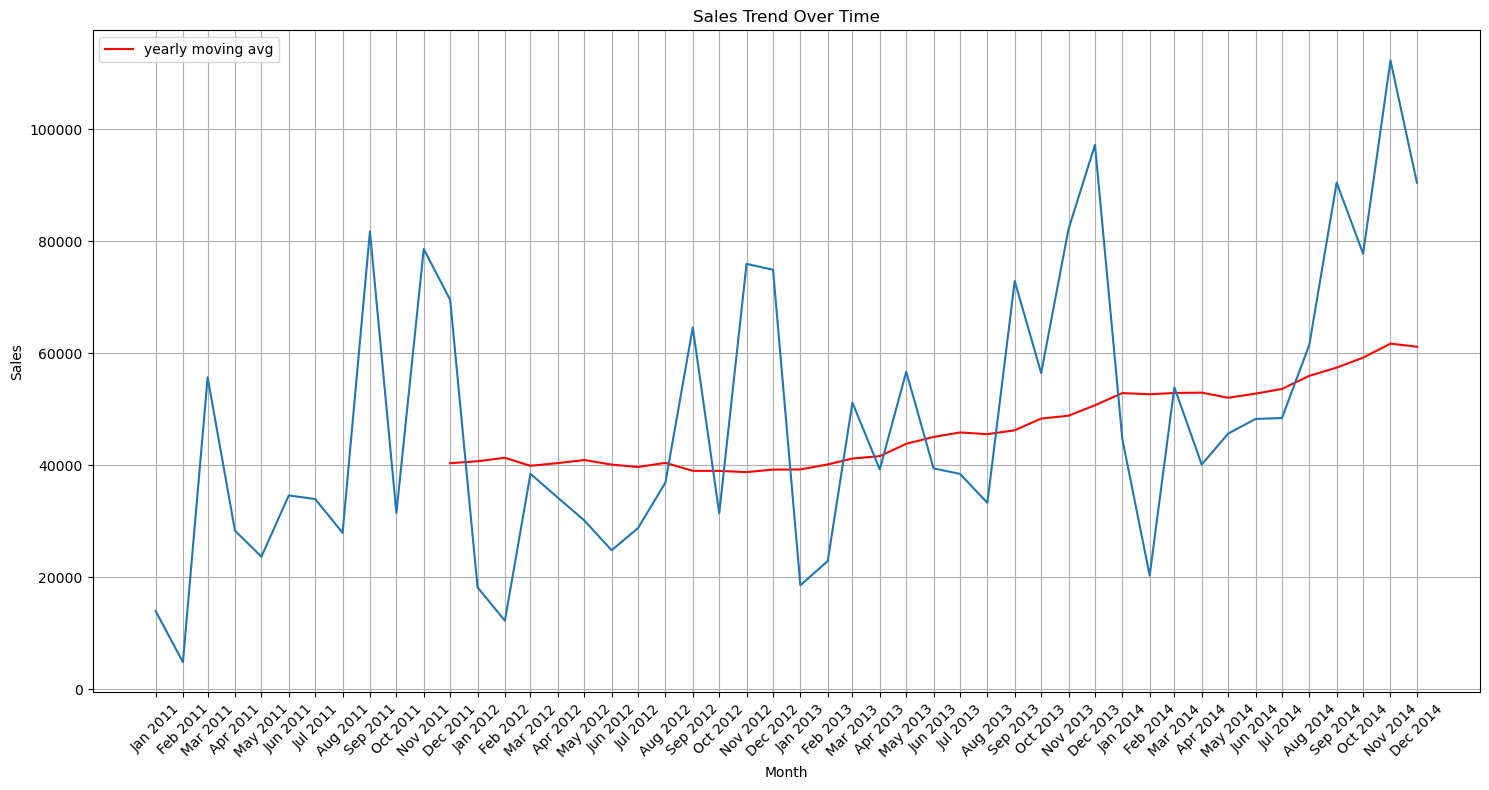

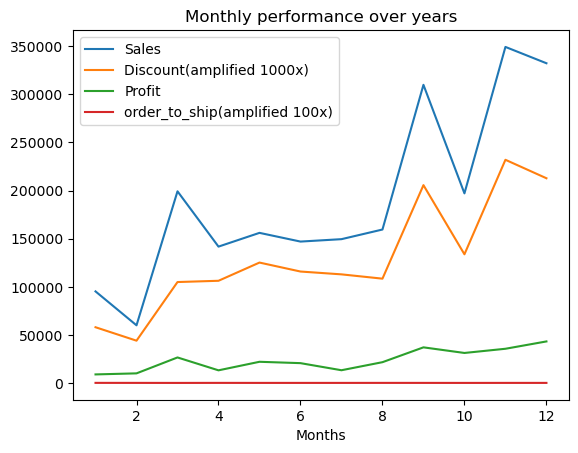

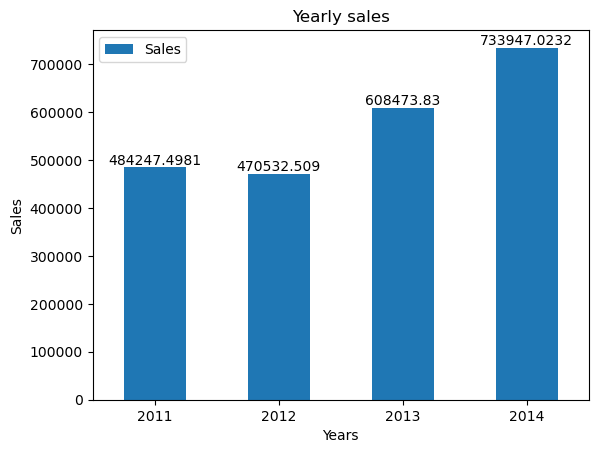

In [42]:
#sales over time 
sales_trend = df.groupby(['year','month'])['Sales'].sum().reset_index()
sales_trend

#Combine year and month for the x-axis
sales_trend['Date'] = pd.to_datetime(sales_trend[['year', 'month']].assign(day=1))

sales_trend['sales_avg'] = sales_trend['Sales'].rolling(window = 12).mean()

plt.figure(figsize = (15,8))

plt.plot(sales_trend['Date'], sales_trend['sales_avg'], color = 'r', label = 'yearly moving avg')
sns.lineplot(data = sales_trend, x = 'Date', y = 'Sales')

plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(sales_trend['Date'], sales_trend['Date'].dt.strftime('%b %Y'), rotation=45)
plt.grid()
plt.tight_layout()

plt.show()




#monthly analysis 
month = df.groupby('month').agg({'Sales':'sum',
                                 'Discount':'sum',
                                 'Profit':'sum',
                                 'order_to_ship':'mean'
                                }).reset_index()

month['Discount'] *= 1000
month['order_to_ship'] *= 100

month.rename(columns = {'Discount':'Discount(amplified 1000x)', 'order_to_ship':'order_to_ship(amplified 100x)'}, inplace = True)

columns_to_plot = month.drop('month', axis = 1)

for columns in columns_to_plot:
    plt.plot(month['month'], month[columns], label = columns)

plt.title('Monthly performance over years')
plt.xlabel('Months')
plt.legend()
plt.show()




#yearly sales
year = df.groupby('year')['Sales'].sum().reset_index()
year.plot(kind = 'bar', x = 'year', y = 'Sales')

for i, count in enumerate(year['Sales']):
    plt.text(i,count, f'{count}', ha = 'center', va = 'bottom') 
    
plt.title('Yearly sales')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.xticks(rotation = 360)
plt.show()

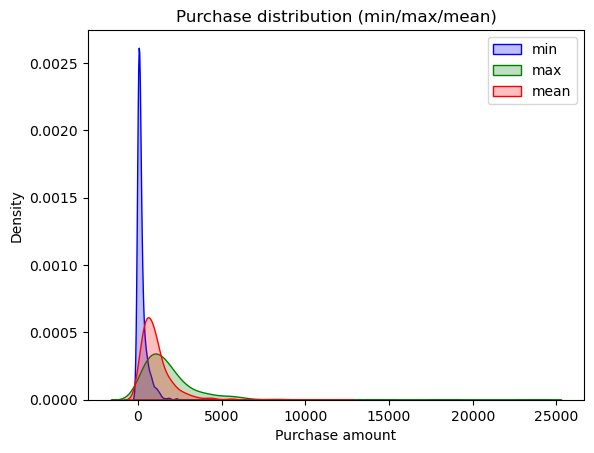

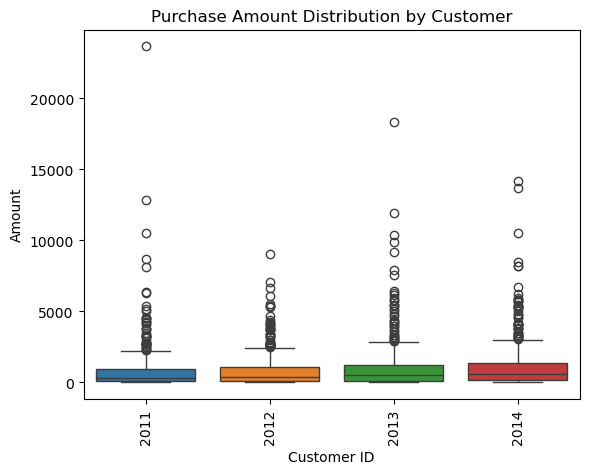

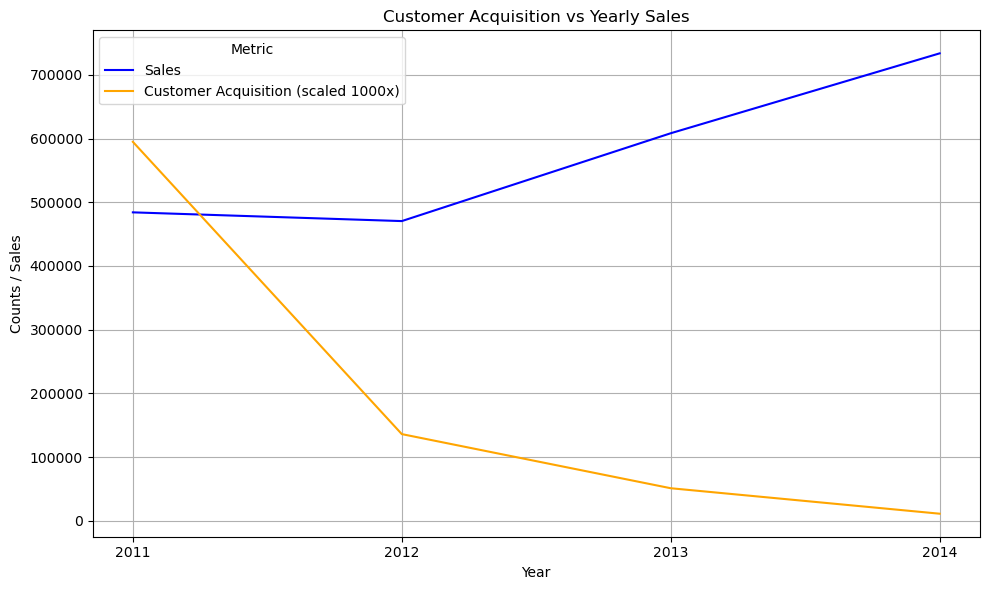

In [44]:
customer = df.groupby(['Customer ID','year'])['Sales'].sum().reset_index().sort_values(by = ['Customer ID','year'])
customer


#pruchase amount distribution

customer_pivot = customer.pivot(index = 'Customer ID', columns= 'year', values = 'Sales')
customer_pivot

customer_pivot['Min purchase'] = customer_pivot.min(axis=1)
customer_pivot['Max purchase'] = customer_pivot.max(axis=1)
customer_pivot['Min-Max difference purchase'] = customer_pivot['Max purchase'] - customer_pivot['Min purchase']
customer_pivot['Mean purchase'] = customer_pivot.mean(axis=1)

def first_non_null_year(row):
    return row.first_valid_index()

first_non_null_years = customer_pivot.apply(first_non_null_year, axis=1)
customer_pivot['Years of relationship'] = 2014 - first_non_null_years + 1


#method 1
sns.kdeplot(data = customer_pivot, x = 'Min purchase', fill = True, color = 'blue', label = 'min')
sns.kdeplot(data = customer_pivot, x = 'Max purchase', fill = True, color = 'Green', label = 'max')
sns.kdeplot(data = customer_pivot, x = 'Mean purchase', fill = True, color = 'red', label = 'mean')

plt.title('Purchase distribution (min/max/mean)')
plt.xlabel('Purchase amount')
plt.legend()
plt.show()



#Yearly purchase amount distribution 

box = customer_pivot.drop(columns=['Min purchase', 'Max purchase', 'Min-Max difference purchase', 'Mean purchase', 'Years of relationship'])
sns.boxplot(data=box)
plt.title('Purchase Amount Distribution by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

#acquisition vs sales

custoemr_first_year=customer.groupby('Customer ID')['year'].min()
acquisition = custoemr_first_year.value_counts().reset_index()

year = df.groupby('year')['Sales'].sum().reset_index()
acquisition_vs_sales = year.merge(acquisition, on = 'year', how = 'left')
acquisition_vs_sales

plt.figure(figsize=(10, 6))

# Plot Sales
plt.plot(acquisition_vs_sales['year'], acquisition_vs_sales['Sales'],  label='Sales', color='blue')

# Plot Customer Counts
plt.plot(acquisition_vs_sales['year'], acquisition_vs_sales['count']*1000,  label='Customer Acquisition (scaled 1000x)', color='orange')

# Final touches on the plot
plt.title('Customer Acquisition vs Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Counts / Sales')
plt.xticks(acquisition_vs_sales['year'])  # Rotate x-ticks for better visibility
plt.legend(title='Metric')
plt.tight_layout()  # Adjust layout to make it neat
plt.grid()  # Add grid for better readability
plt.show()

<Figure size 2000x1500 with 0 Axes>

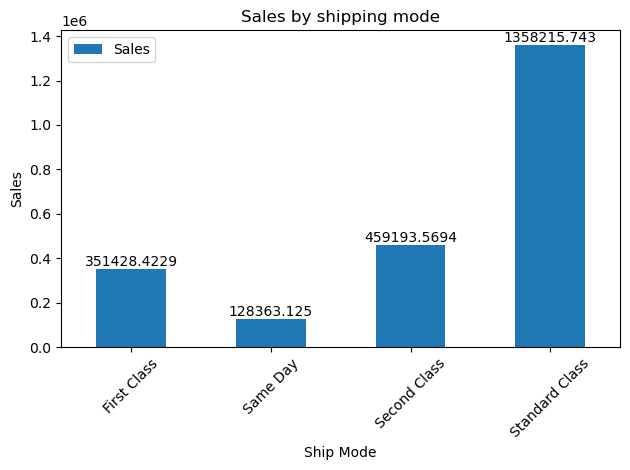

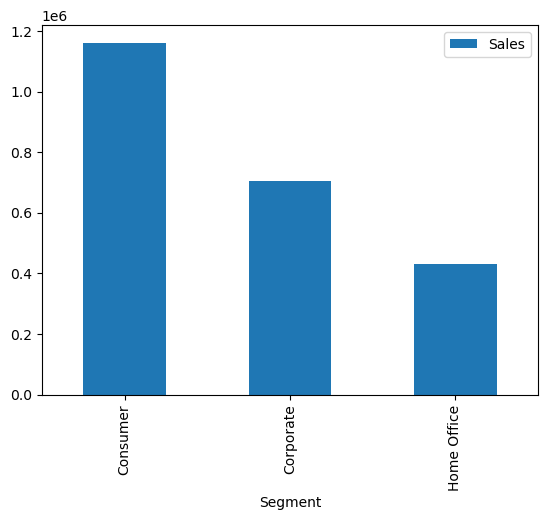

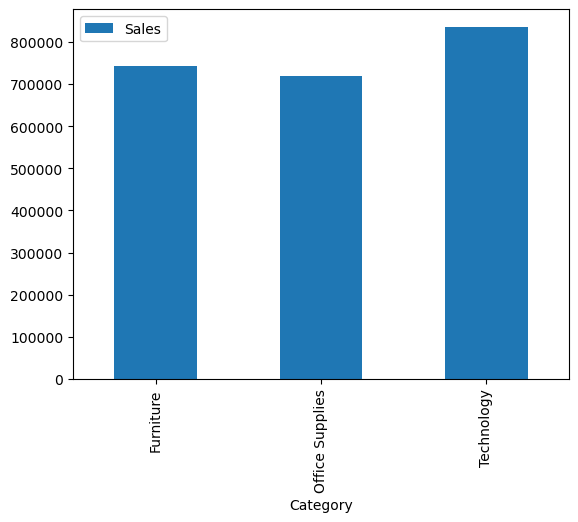

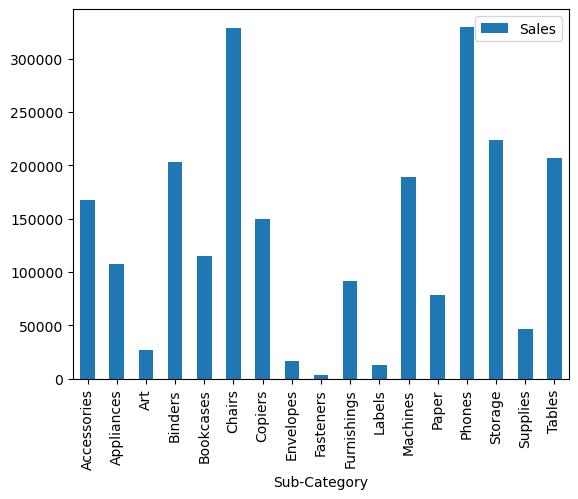

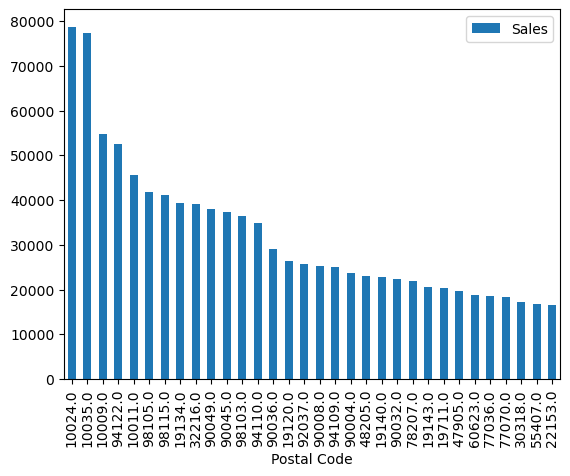

In [46]:
#sales analysis by columns
plt.figure(figsize = (20,15))

sales_ship_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()
sales_ship_mode.plot(kind = 'bar', x = 'Ship Mode', y = 'Sales')

for i, count in enumerate(sales_ship_mode['Sales']):
    plt.text(i,count, f'{count}', ha = 'center', va = 'bottom')
plt.title('Sales by shipping mode')
plt.xticks(rotation = 45)
plt.ylabel('Sales')
plt.tight_layout()



#sales by segment 
sales_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_segment.plot(kind = 'bar', x = 'Segment', y = 'Sales')



#sales by category, sub-category
sales_category= df.groupby('Category')['Sales'].sum().reset_index()
sales_category.plot(kind = 'bar', x = 'Category', y = 'Sales')


#sales by category, sub-category
sales_sub_category= df.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_sub_category.plot(kind = 'bar', x = 'Sub-Category', y = 'Sales')


#sales by postal code
sales_postal_code = df.groupby('Postal Code')['Sales'].sum().reset_index()
sales_postal_code = sales_postal_code.sort_values(by = 'Sales', ascending = False)

# query to filter for top 5% sales/ .nlargest(5) top 5 postal code
threshold = sales_postal_code['Sales'].quantile(0.95)
top_5_percent_sales = sales_postal_code.query('Sales >= @threshold')


top_5_percent_sales.plot(kind = 'bar', x = 'Postal Code', y = 'Sales')




plt.show()


### Order handle efficiency

In [55]:
#order_to_ship performance on ship mode, segment, region, total sales 

list = ['Ship Mode','Segment','Region','Sub-Category']

for item in list: 
    duration = df.groupby(item)['order_to_ship'].mean().reset_index()
    print(duration)


        Ship Mode  order_to_ship
0     First Class       2.182055
1        Same Day       0.044199
2    Second Class       3.240103
3  Standard Class       5.007205
       Segment  order_to_ship
0     Consumer       3.942400
1    Corporate       4.008940
2  Home Office       3.922042
    Region  order_to_ship
0  Central       4.058115
1     East       3.909761
2    South       3.959877
3     West       3.930066
   Sub-Category  order_to_ship
0   Accessories       3.887742
1    Appliances       3.989270
2           Art       4.052764
3       Binders       4.022981
4     Bookcases       3.811404
5        Chairs       3.904376
6       Copiers       3.617647
7     Envelopes       4.015748
8     Fasteners       3.976959
9   Furnishings       3.961338
10       Labels       4.005495
11     Machines       3.747826
12        Paper       3.886861
13       Phones       4.003375
14      Storage       3.975177
15     Supplies       4.015789
16       Tables       3.896552


### Profitability 

Correlation:0.4851


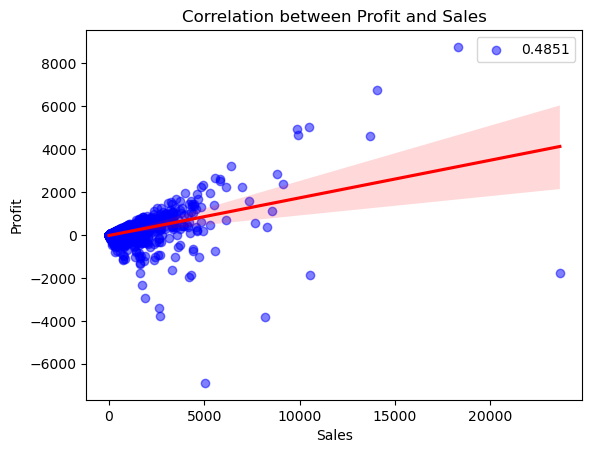

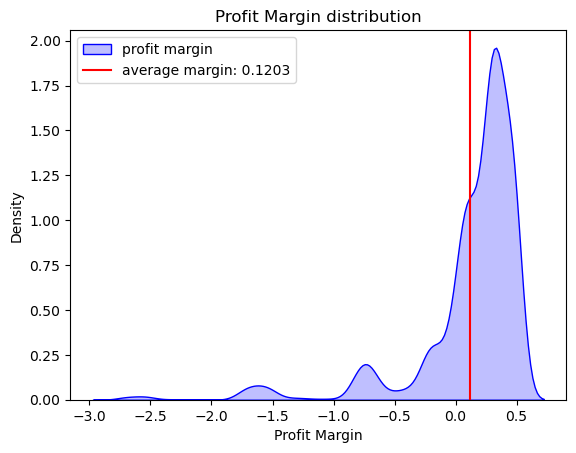

In [58]:
#profot margin of purchase size 
pm = df.groupby('Order ID').agg({'Sales':'sum',
                                 'Profit': 'sum'
                                }).reset_index()



pm.drop(columns = 'Order ID', axis = 1, inplace = True)

corr = pm.corr()
correlation_value = corr.loc['Sales', 'Profit'].round(4)
print(f'Correlation:{correlation_value}')

sns.regplot(x=pm['Sales'], y=pm['Profit'],
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"},
           label = correlation_value)
plt.title('Correlation between Profit and Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()


df['Profit Margin'] = df['Profit'] / df['Sales']
average_margin = df['Profit Margin'].mean().round(4)
sns.kdeplot(data = df, x = 'Profit Margin', fill = True, color = 'blue', label = 'profit margin')
plt.axvline(average_margin, color = 'r', label = f'average margin: {average_margin}')
plt.title('Profit Margin distribution')
plt.legend()

In [59]:
yr_pm = df.groupby('year')[['Sales','Profit']].sum()
yr_pm['net_profit'] = yr_pm['Profit']/yr_pm['Sales']
yr_pm

,Sales,Profit,net_profit
year,,,
2011,484247.4981,49543.9741,0.102311
2012,470532.5090,61618.6037,0.130955
2013,608473.8300,81726.9308,0.134315
2014,733947.0232,93507.5131,0.127404


Text(0, 0.5, 'Profit margin (/100%)')

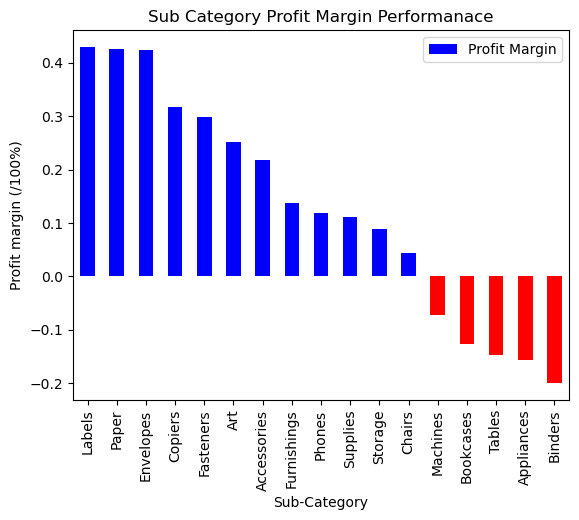

In [60]:
#sub-category profit margin performance 
sub_category_pm = df.groupby(['Category','Sub-Category'])['Profit Margin'].mean().reset_index().sort_values(by = 'Profit Margin', ascending = False)


colors = ['red' if profit_margin <0 else 'blue' for profit_margin in sub_category_pm['Profit Margin']]
sub_category_pm.plot(kind = 'bar', x = 'Sub-Category', y = 'Profit Margin', color = colors)
plt.title('Sub Category Profit Margin Performanace')
plt.ylabel('Profit margin (/100%)')

Text(0.5, 1.0, 'Discount Distribution')

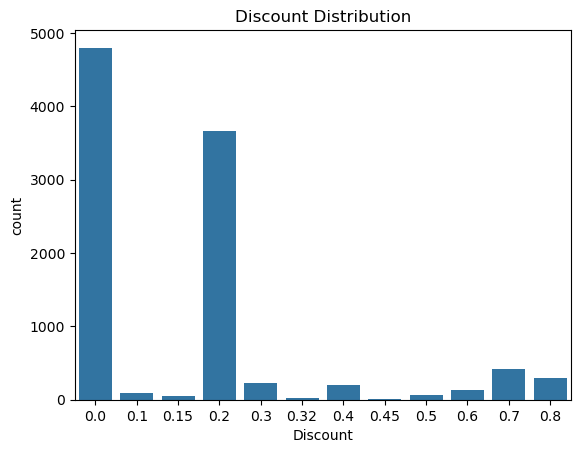

In [62]:
#Discount distribution 

a = df['Discount'].value_counts().reset_index().sort_values(by = 'Discount')
sns.barplot(data = a, x = 'Discount', y = 'count')
plt.title('Discount Distribution')

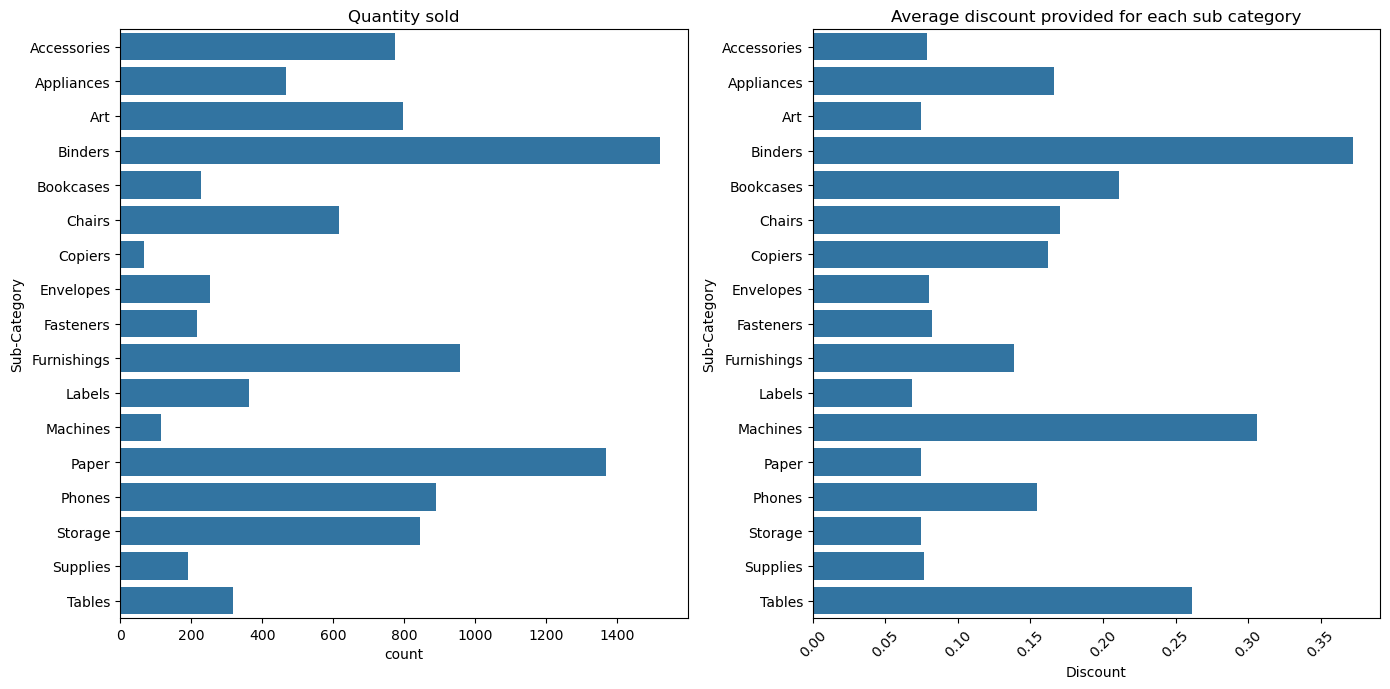

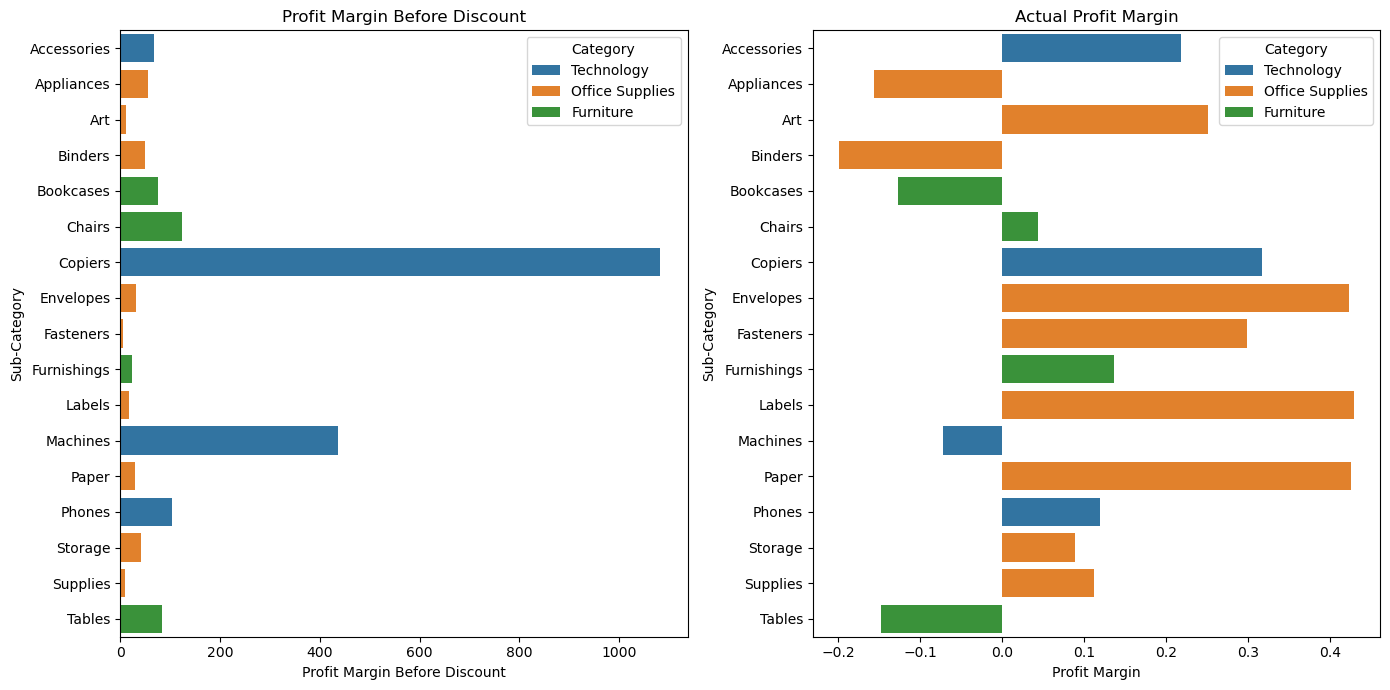

In [63]:
#discount effect
#sub category count

fig, axes = plt.subplots(1,2, figsize = (14,7))

sub_cat_cnt = df['Sub-Category'].value_counts().reset_index(name = 'count').sort_values(by = 'Sub-Category')
sns.barplot(data = sub_cat_cnt, x = 'count', y = 'Sub-Category', ax = axes[0]) 
axes[0].set_title('Quantity sold')

#sub cateory average discount 
sub_cat_dis = df.groupby('Sub-Category')['Discount'].mean().reset_index().sort_values(by = 'Sub-Category')

sns.barplot( x = 'Discount', y = 'Sub-Category', data = sub_cat_dis, ax= axes[1])
axes[1].set_title('Average discount provided for each sub category')

plt.xticks(rotation = 45)
plt.tight_layout()


#profit margin before discount 
df['profit_margin_before_discount'] = df['Sales'] * df['Discount'] + df['Profit']
df_sorted = df.sort_values(by='Sub-Category')

fig, axes = plt.subplots(1,2, figsize = (14,7))

sns.barplot(data=df_sorted, x='profit_margin_before_discount', y='Sub-Category', hue='Category', errorbar=None, ax=axes[0])
axes[0].set_title('Profit Margin Before Discount')
axes[0].set_xlabel('Profit Margin Before Discount')
axes[0].set_ylabel('Sub-Category')

#net profit margin 
sns.barplot(data=df_sorted, x='Profit Margin', y='Sub-Category', hue='Category', errorbar=None, ax=axes[1])
axes[1].set_title('Actual Profit Margin')
axes[1].set_xlabel('Profit Margin')
axes[1].set_ylabel('Sub-Category')


plt.tight_layout()
plt.show()


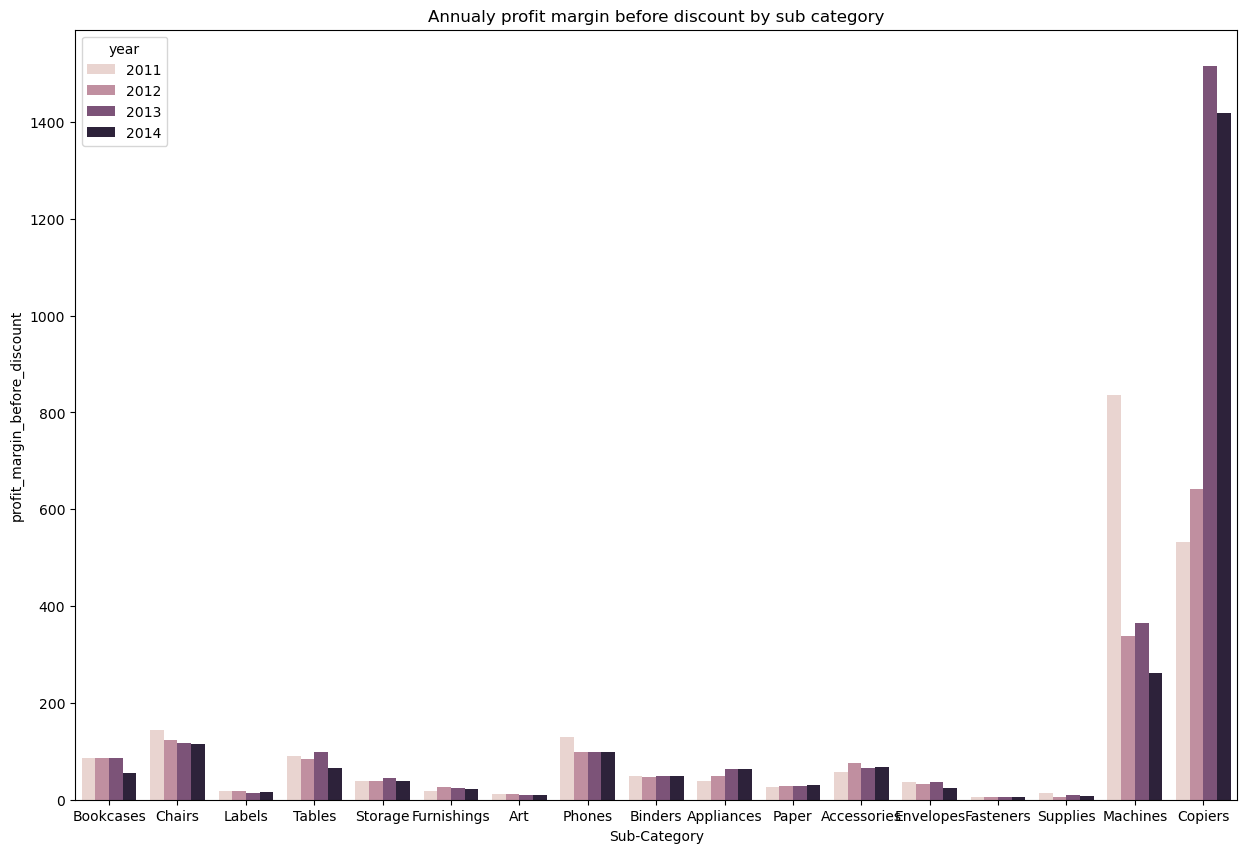

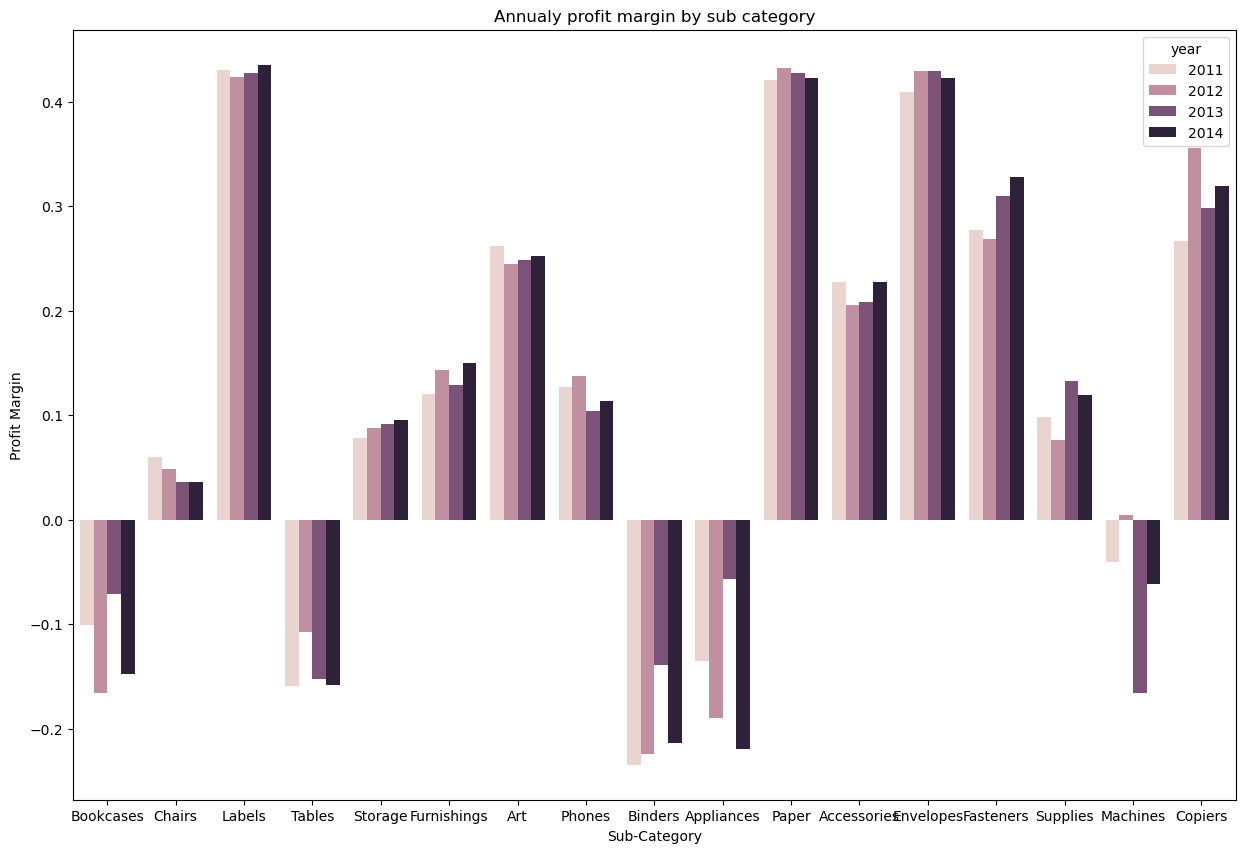

In [64]:
plt.figure(figsize = (15,10))
sns.barplot(data=df, x='Sub-Category', y='profit_margin_before_discount', hue='year', errorbar=None)
plt.title('Annualy profit margin before discount by sub category')
plt.show()


plt.figure(figsize = (15,10))
sns.barplot(data=df, x='Sub-Category', y='Profit Margin', hue='year', errorbar=None)
plt.title('Annualy profit margin by sub category')
plt.show()

C:\Users\hosin\AppData\Local\Temp\ipykernel_1140\2141861547.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_regions))  # Use a colormap with distinct colors


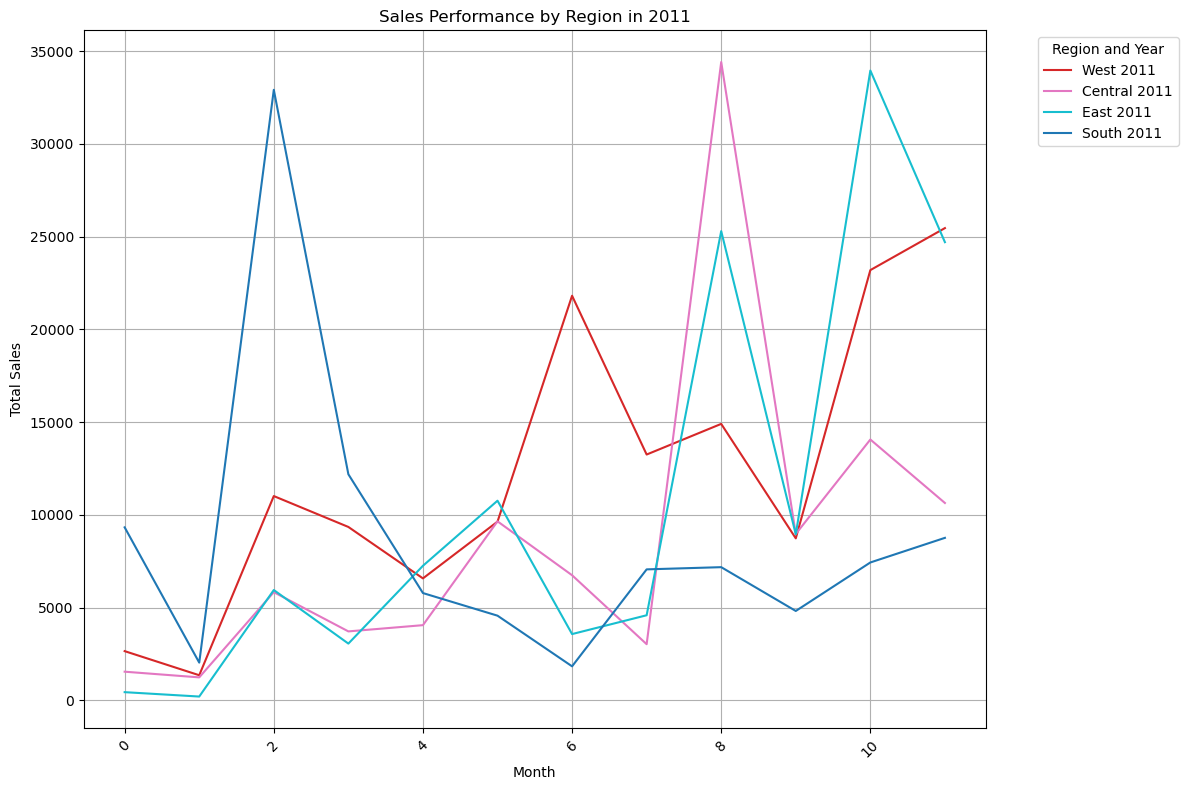

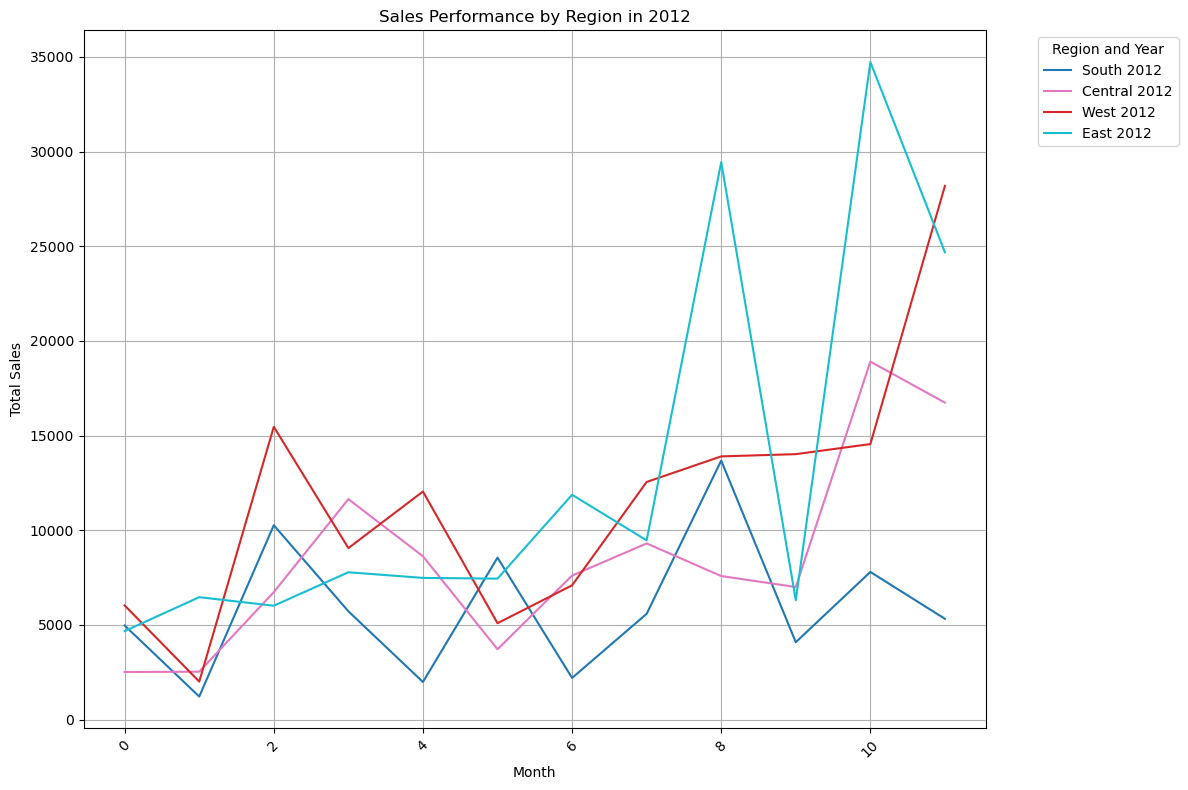

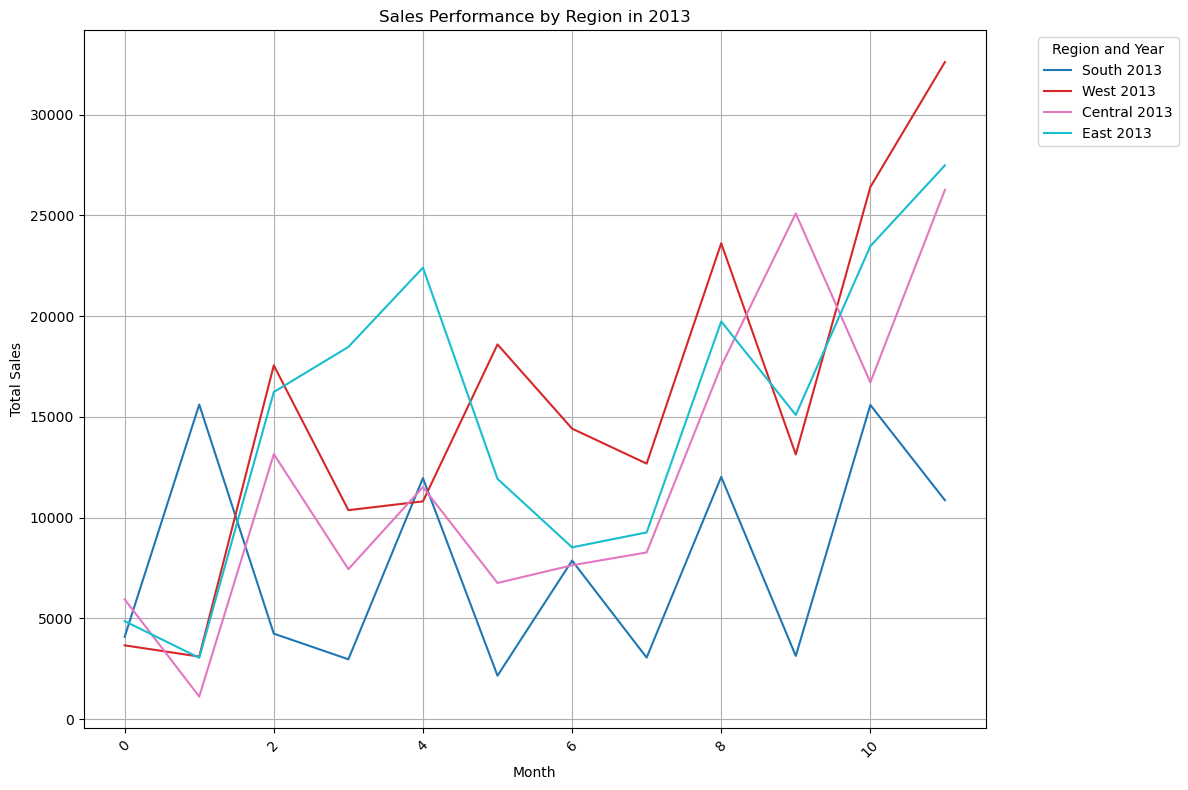

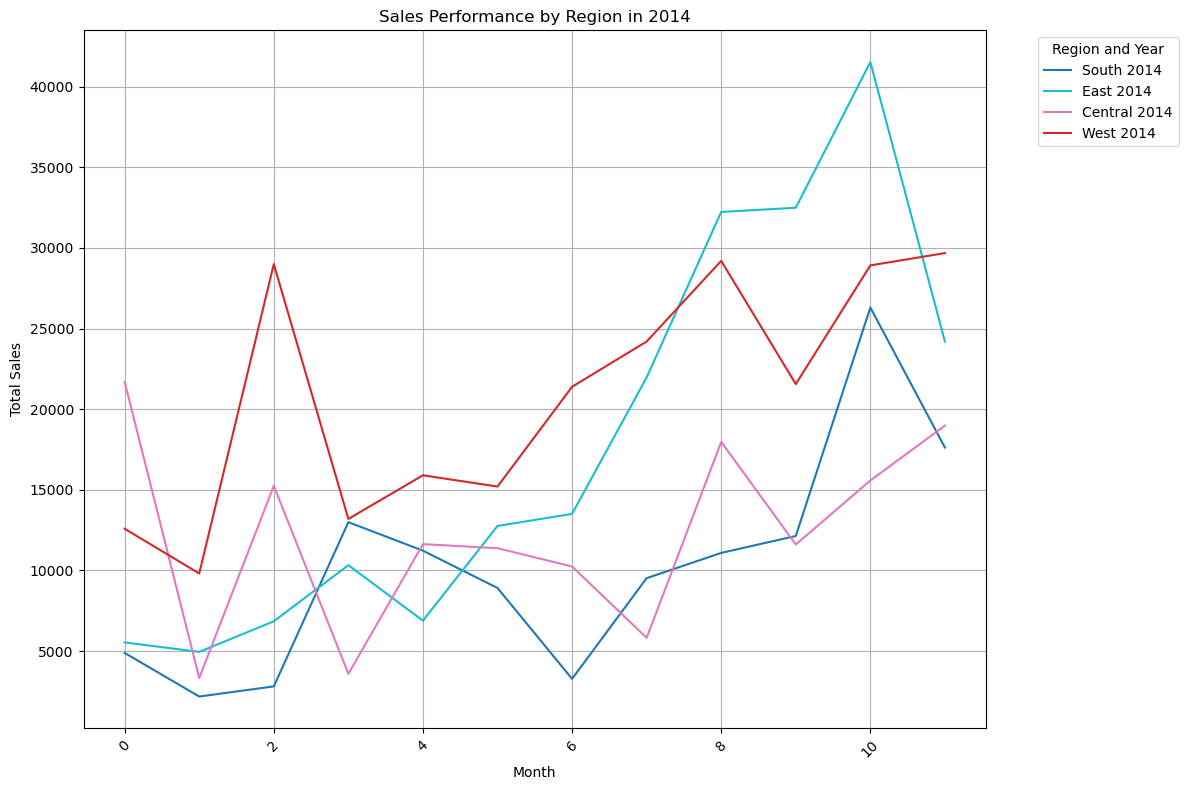

In [103]:
#regional sales trend - seasonality 
years = [2011,2012,2013,2014]

#color mappingg 
unique_regions = df['Region'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_regions))  # Use a colormap with distinct colors
color_map = {region: colors(i) for i, region in enumerate(unique_regions)}


for year in years:
    sales_data = df.query('year == @year')  # Filter data for the specific year
    plt.figure(figsize = (12,8))

    added_labels = set()
    
    for region in sales_data['Region'].unique():  # Loop through unique regions
        monthly_sales = sales_data.query('Region == @region').groupby('month')['Sales'].sum().reset_index()
        
        label = f'{region} {year}'
        plt.plot(monthly_sales.index, monthly_sales['Sales'], linewidth=1.5, 
                 label=label if label not in added_labels else "", 
                 color=color_map[region])
        
        # Add the label to the set
        if label not in added_labels:
            added_labels.add(label)


    plt.title(f'Sales Performance by Region in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)  
    plt.legend(title='Region and Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    plt.grid()
    plt.tight_layout() 
    plt.show()

### Consumer charateristic 

Number of Customers 793
Number of unique customers in each region:    Region  unique_customer_count
0  Central                    629
1     East                    674
2    South                    512
3     West                    686
Regional Sales:    Region        sales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245


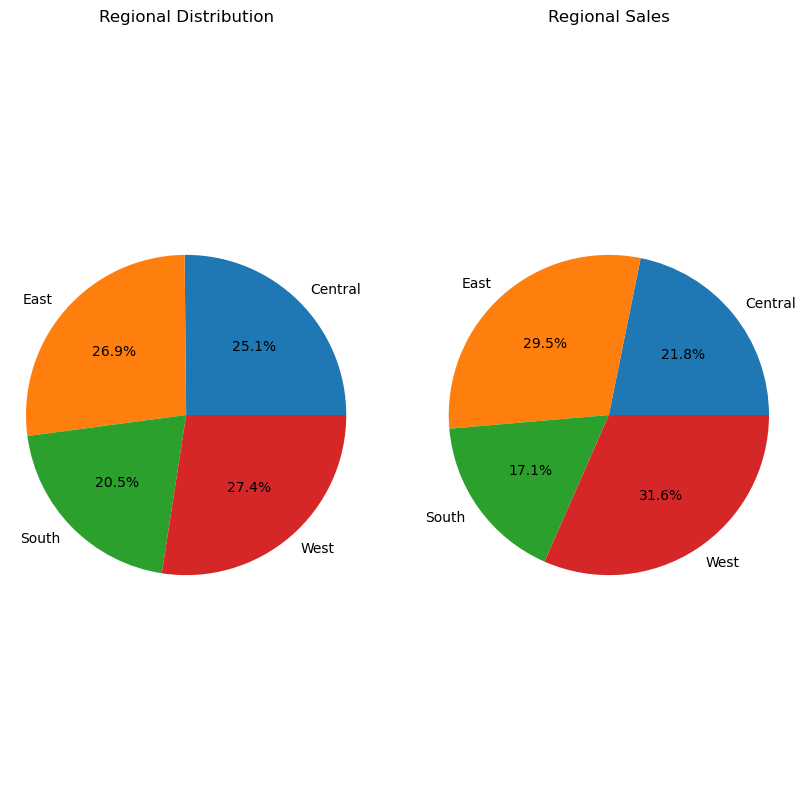

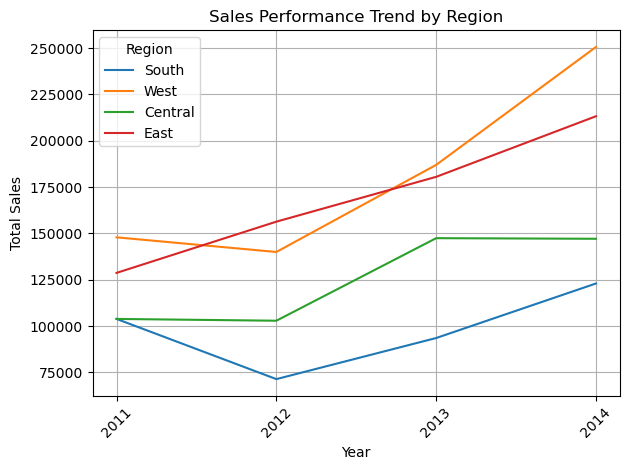

C:\Users\hosin\AppData\Local\Temp\ipykernel_1140\3121741414.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', pivot_table.shape[1])  # Colormap with distinct colors


<Figure size 1500x1200 with 0 Axes>

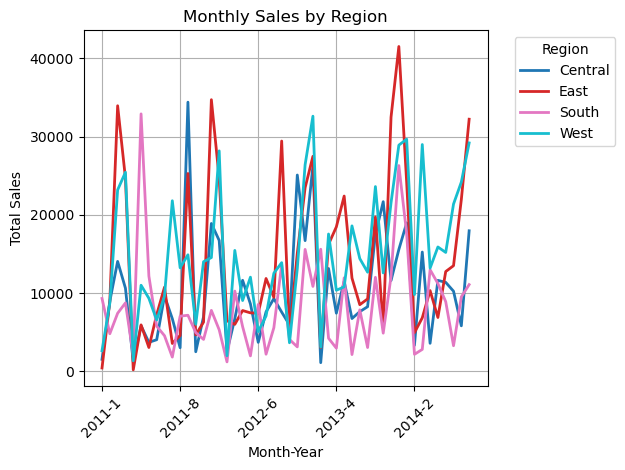

In [106]:
#consumer distribution 
num_of_customer = df['Customer ID'].nunique()
print(f'Number of Customers {num_of_customer}')

df_region = df.groupby('Region')['Customer ID'].nunique().reset_index(name='unique_customer_count')
print(f'Number of unique customers in each region:{df_region}')

df_regional_sales = df.groupby('Region')['Sales'].sum().reset_index(name='sales')
print(f'Regional Sales:{df_regional_sales}')

fig, axes = plt.subplots(1,2,figsize = (10,10))
axes[0].pie(df_region['unique_customer_count'], labels=df_region['Region'], autopct='%1.1f%%')
axes[0].set_title('Regional Distribution')
axes[0].axis('equal')


axes[1].pie(df_regional_sales['sales'], labels=df_regional_sales['Region'], autopct='%1.1f%%')
axes[1].set_title('Regional Sales')
axes[1].axis('equal')
plt.show()


#overall sales trend by region 
for region in df['Region'].unique():
    sales_data = df.query('Region == @region')  # Correcting the query syntax
    yearly_sales = sales_data.groupby('year')['Sales'].sum()
    
    # Plotting
    plt.plot(yearly_sales.index, yearly_sales, linewidth=1.5, label=region)


plt.title('Sales Performance Trend by Region')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales.index, rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Region')
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


#more details - sales group by year month
a = df.groupby(['Region', 'year', 'month'])['Sales'].sum().reset_index()

a['Month_Year'] = a['year'].astype(str) + '-' + a['month'].astype(str)

# Pivot the DataFrame to have Month-Year as index and Regions as columns
pivot_table = a.pivot(index='Month_Year', columns='Region', values='Sales')

# Create a color mapping for regions
colors = plt.cm.get_cmap('tab10', pivot_table.shape[1])  # Colormap with distinct colors

plt.figure(figsize=(15, 12))
pivot_table.plot(kind='line', linewidth=2, color=[colors(i) for i in range(pivot_table.shape[1])])


plt.title('Monthly Sales by Region')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid()
plt.tight_layout()  
plt.show()

C:\Users\hosin\AppData\Local\Temp\ipykernel_1140\3429304355.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_regions))  # Use a colormap with distinct colors


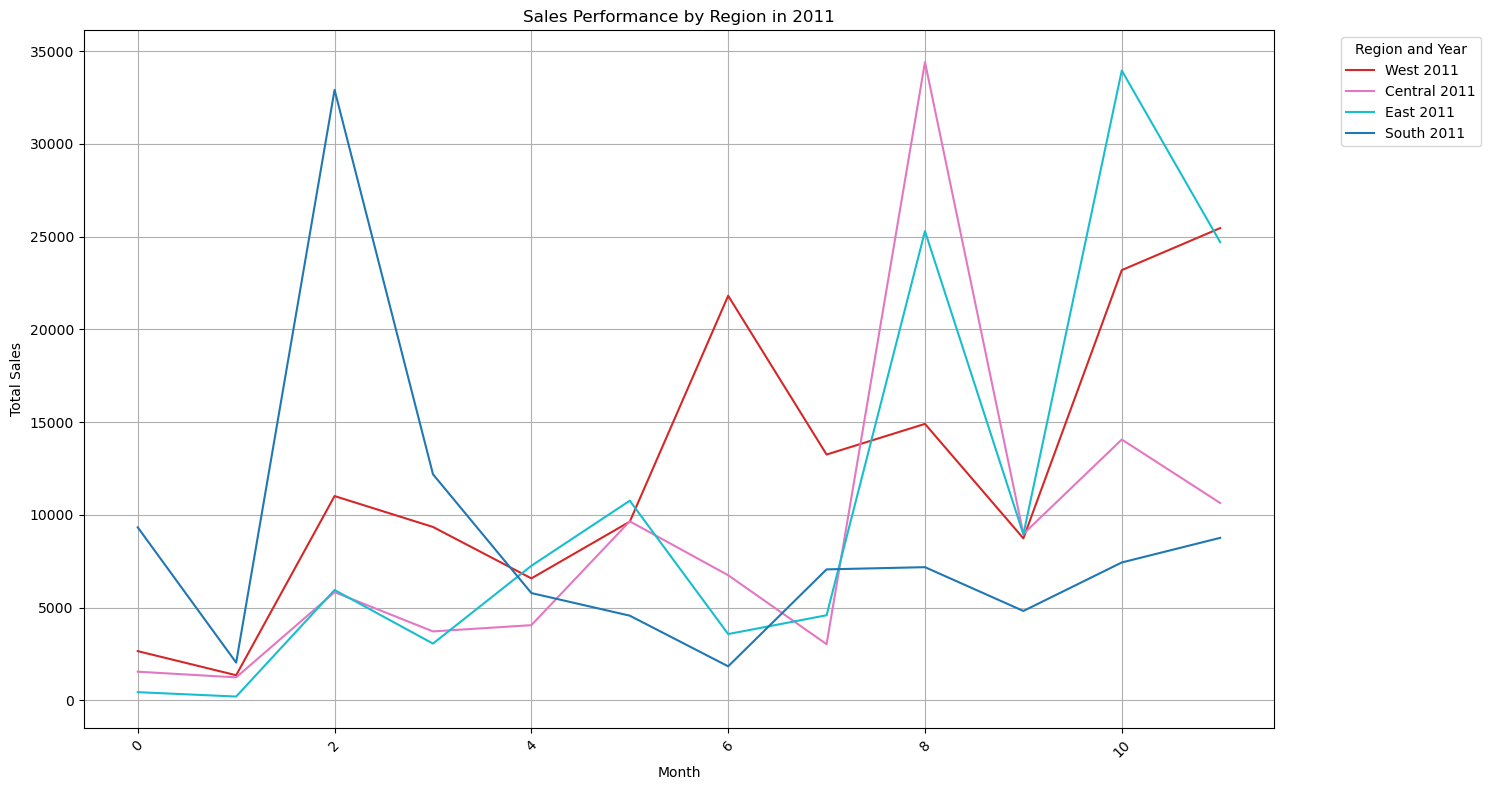

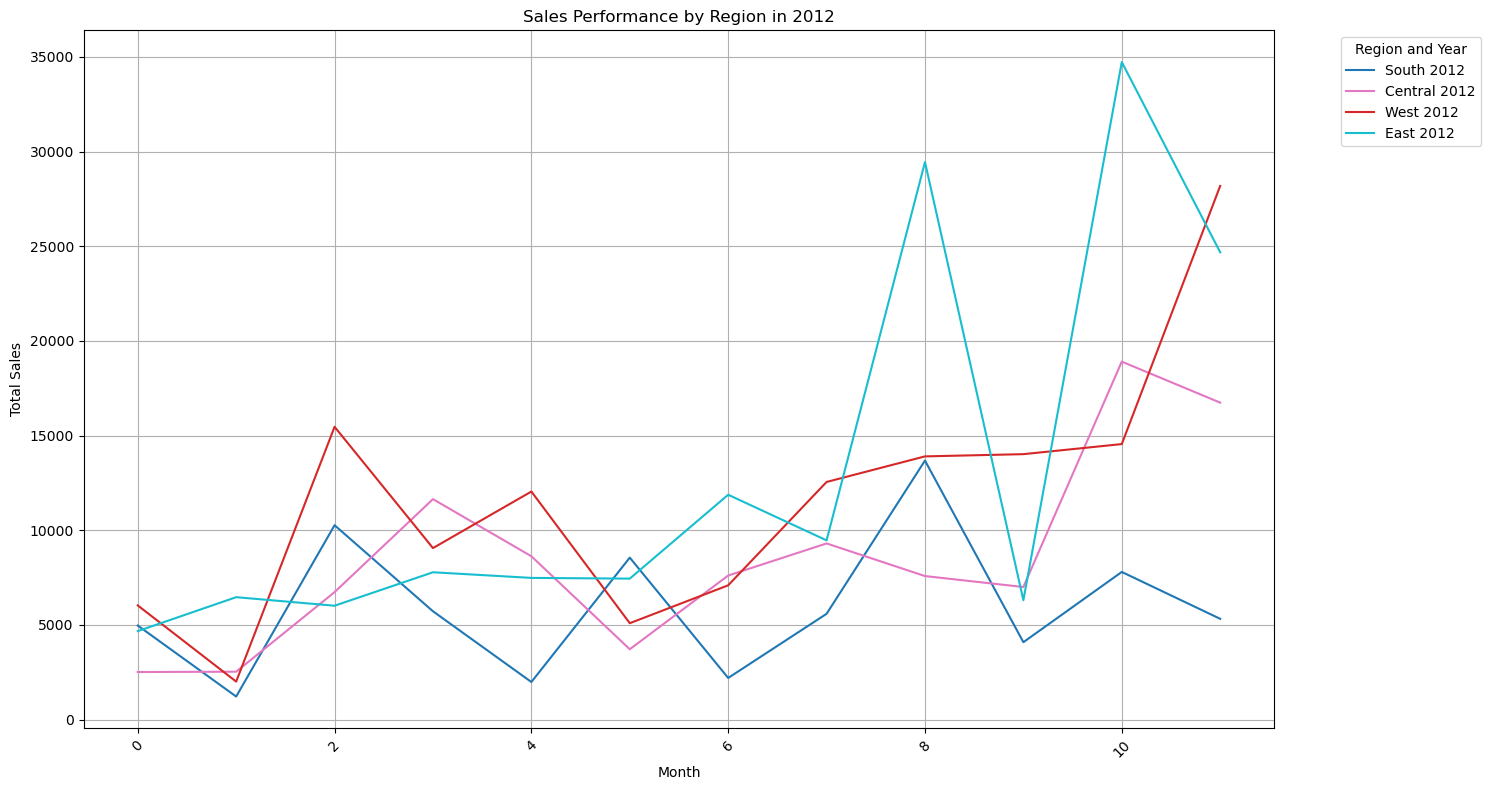

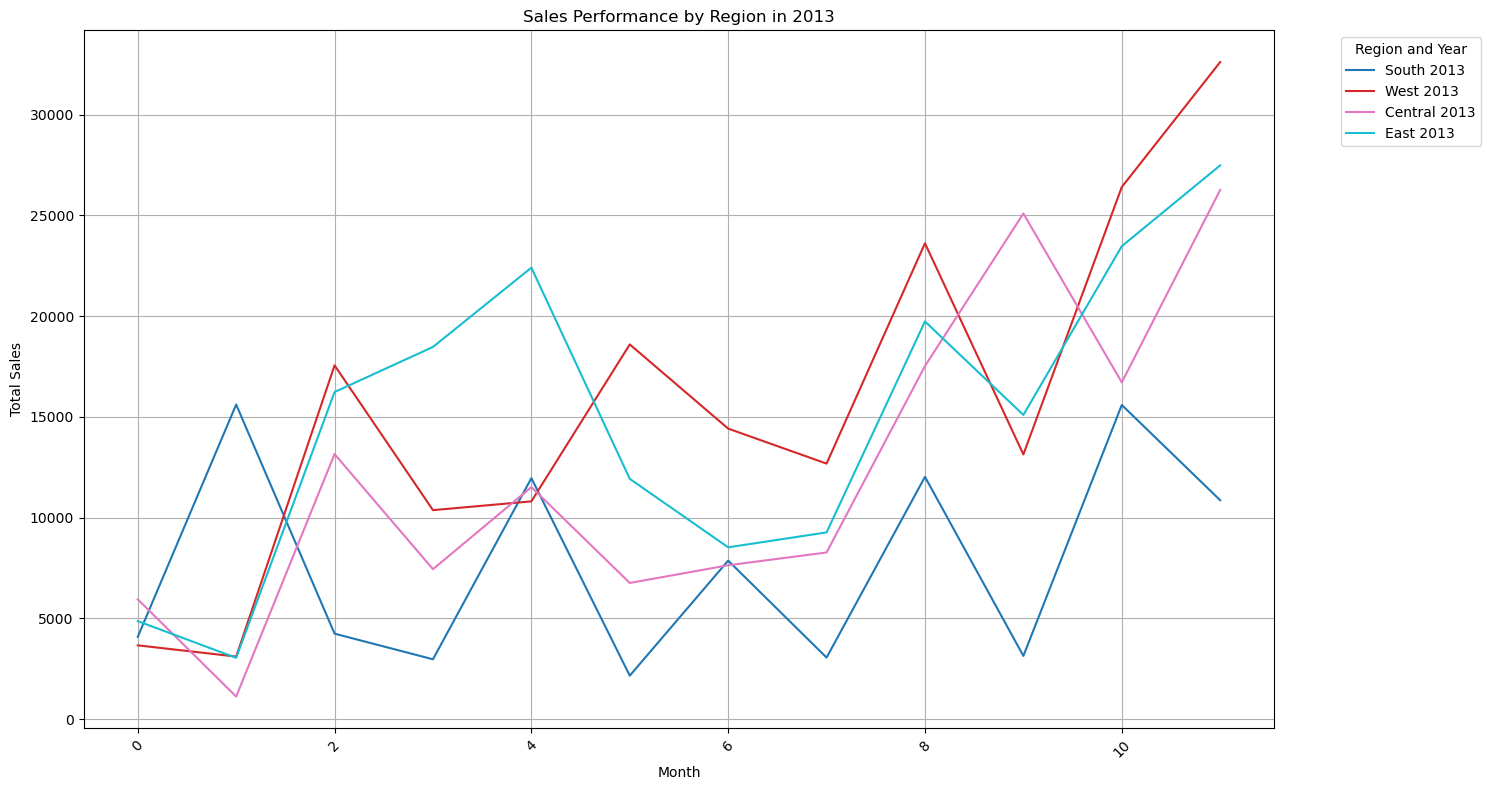

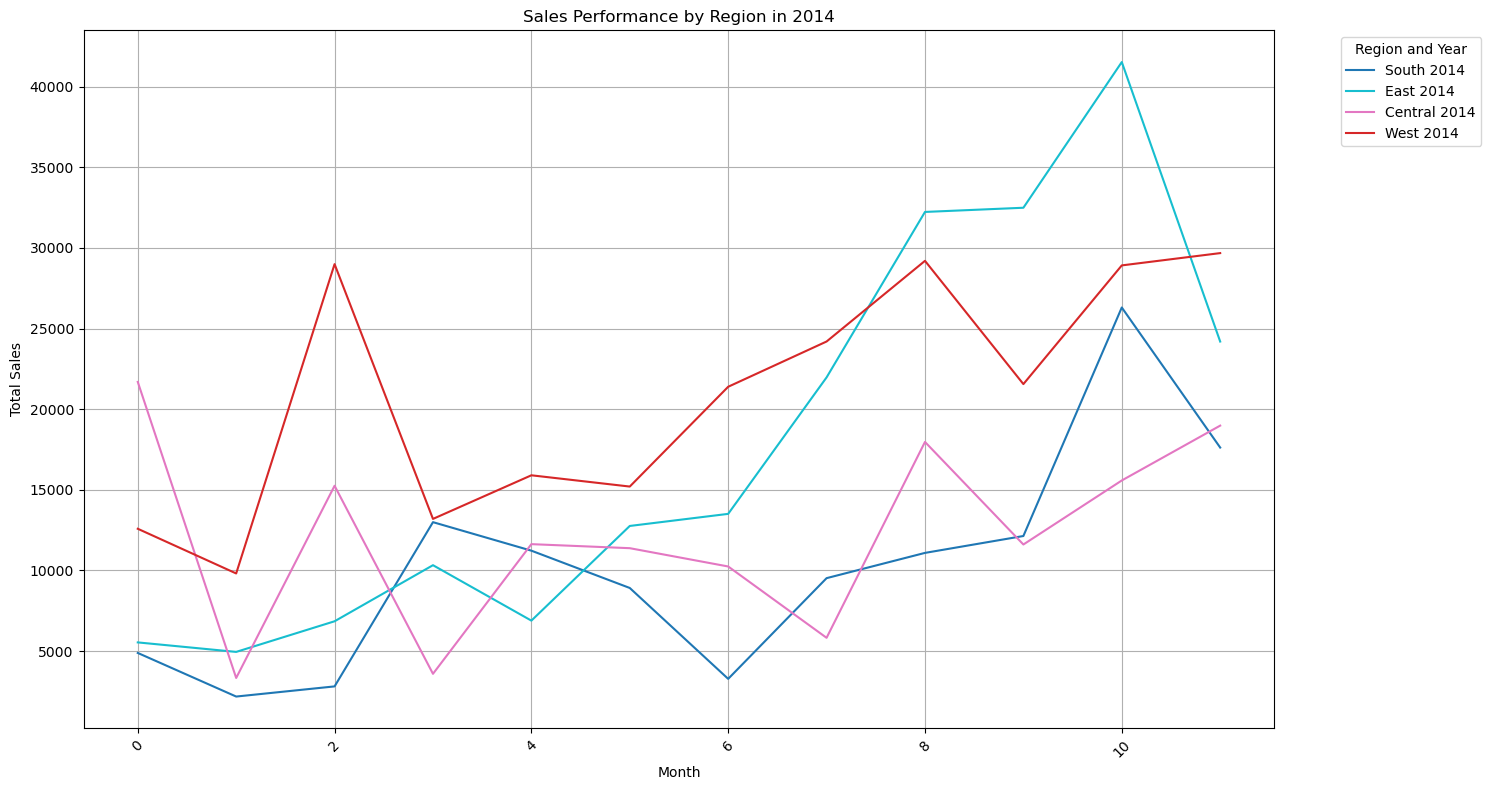

In [108]:
#regional sales trend - seasonality by year
years = [2011,2012,2013,2014]

#color mappingg 
unique_regions = df['Region'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_regions))  # Use a colormap with distinct colors
color_map = {region: colors(i) for i, region in enumerate(unique_regions)}


for year in years:
    sales_data = df.query('year == @year')  # Filter data for the specific year
    plt.figure(figsize = (15,8))

    added_labels = set()
    
    for region in sales_data['Region'].unique():  # Loop through unique regions
        monthly_sales = sales_data.query('Region == @region').groupby('month')['Sales'].sum().reset_index()
        
        label = f'{region} {year}'
        plt.plot(monthly_sales.index, monthly_sales['Sales'], linewidth=1.5, 
                 label=label if label not in added_labels else "", 
                 color=color_map[region])
        
        # Add the label to the set
        if label not in added_labels:
            added_labels.add(label)


    plt.title(f'Sales Performance by Region in {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)  
    plt.legend(title='Region and Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    plt.grid()
    plt.tight_layout() 
    plt.show()

In [75]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,year,month,order_to_ship,Profit Margin,profit_margin_before_discount
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2.0,0.00,41.9136,2013,11,3,0.1600,41.913600
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3.0,0.00,219.5820,2013,11,3,0.3000,219.582000
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Corporate,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2.0,0.00,6.8714,2013,6,4,0.4700,6.871400
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,5.0,0.45,-383.0310,2012,10,7,-0.4000,47.878875
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2.0,0.20,2.5164,2012,10,7,0.1125,6.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Consumer,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,25.2480,3.0,0.20,4.1028,2011,1,2,0.1625,9.152400
9990,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,91.9600,2.0,0.00,15.6332,2014,2,5,0.1700,15.633200
9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,92627.0,West,TEC-PH-10003645,Technology,Phones,258.5760,2.0,0.20,19.3932,2014,2,5,0.0750,71.108400
9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Consumer,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,29.6000,4.0,0.00,13.3200,2014,2,5,0.4500,13.320000


,Customer ID,year,Sales,last_year,Consecutive,pct chaneg
0,AA-10315,2011,756.048,NaN,False,NaN
1,AA-10315,2012,26.960,756.048,True,-0.964341
2,AA-10315,2013,4406.072,26.960,True,162.429970
3,AA-10315,2014,374.480,4406.072,True,-0.915008
4,AA-10375,2011,50.792,NaN,False,-0.864367
...,...,...,...,...,...,...
2493,ZC-21910,2013,3215.733,2994.162,True,0.074001
2494,ZC-21910,2014,227.066,3215.733,True,-0.929389
2495,ZD-21925,2011,244.760,NaN,False,0.077924
2496,ZD-21925,2013,1187.744,244.760,False,3.852688


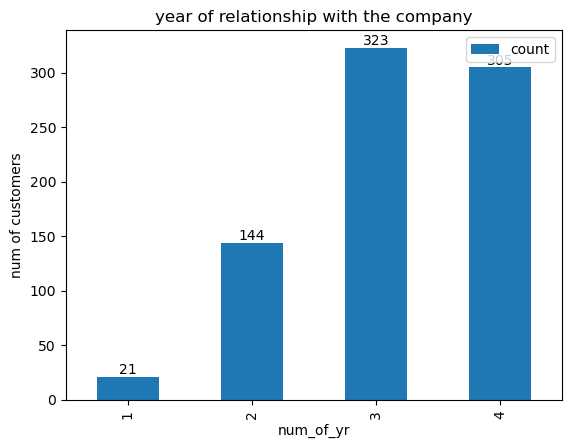

In [110]:
#consumer behaviour analysis 
df[df['Customer ID'] == 'DV-13045']

customer = df.groupby(['Customer ID','year'])['Sales'].sum().reset_index().sort_values(by = ['Customer ID','year'])
customer['last_year'] = customer.groupby('Customer ID')['Sales'].shift(1)
customer['Consecutive'] = customer.groupby('Customer ID')['year'].diff().eq(1)
customer['pct chaneg'] = customer['Sales'].pct_change()


cnt = customer['Customer ID'].value_counts().reset_index(name ='num_of_yr')
cnt = cnt.groupby('num_of_yr')['Customer ID'].count().reset_index(name = 'count')
cnt
cnt.plot(kind = 'bar', x = 'num_of_yr', y = 'count')

for i, count in enumerate(cnt['count']):
    plt.text(i,count, f'{count}', ha = 'center', va = 'bottom') 

plt.title('year of relationship with the company')
plt.ylabel('num of customers')

customer

In [130]:
#Recency, Frequency, and Monetary (RFM) Analysis



df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)  # Format as YYYY-MM

df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df['year_month'] = df['year_month'].dt.strftime('%Y-%m')

a = df.groupby('Order ID')['Sales'].sum().reset_index()
b = df[['Order Date','year','month','Order ID', 'Customer ID']].drop_duplicates()
c = b.merge(a, on = 'Order ID', how = 'left')


c = c.sort_values(by=['Customer ID', 'Order Date'])
c['pct_change'] = c.groupby('Customer ID')['Sales'].pct_change()*100
c['purchase_gap'] = c['Order Date'] - c.groupby('Customer ID')['Order Date'].shift(1)


#customer avergae purchase gap
apg = c.groupby('Customer ID')['purchase_gap'].mean().reset_index(name = 'avg_purchase_gap').sort_values(by = 'avg_purchase_gap', ascending = False)
avg_purchase_size = c.groupby('Customer ID')['Sales'].mean().reset_index(name = 'avg_purchase_size')
apg = apg.merge(avg_purchase_size, on = 'Customer ID', how = 'left')

total_amount_of_purchase =  c.groupby('Customer ID')['Sales'].sum().reset_index(name = 'total_amount_of_purchase')
apg = apg.merge(total_amount_of_purchase, on = 'Customer ID', how = 'left')
total_number_of_purchase =  c.groupby('Customer ID')['Order ID'].count().reset_index(name = 'total_number_of_purchase')
apg = apg.merge(total_number_of_purchase, on = 'Customer ID', how ='left')

#apg['average_purchase_power'] = apg['total_amount_of_purchase'] / apg['total_number_of_purchase']
#apg = apg.sort_values(by = 'average_purchase_power', ascending =False)

customer_segment = df[['Customer ID' , 'Segment']].drop_duplicates()

apg =apg.merge(customer_segment, on = 'Customer ID', how ='left')
apg.head(20)

print(apg.describe()



,avg_purchase_gap,avg_purchase_size,total_amount_of_purchase,total_number_of_purchase
count,781,793.000000,793.000000,793.000000
mean,226 days 04:46:49.756389576,460.147734,2896.848500,6.316520
std,132 days 14:31:37.784771782,433.400951,2628.670117,2.550885
min,2 days 00:00:00,2.416500,4.833000,1.000000
25%,144 days 20:34:17.142857142,213.255333,1146.050000,5.000000
50%,192 days 16:00:00,362.503250,2256.394000,6.000000
75%,268 days 04:48:00,550.377000,3785.276000,8.000000
max,1276 days 00:00:00,5008.610000,25043.050000,17.000000


In [165]:
#Customer clustering 
apg

,Customer ID,avg_purchase_gap,avg_purchase_size,total_amount_of_purchase,total_number_of_purchase,Segment
0,MW-18235,1276 days,2626.938,5253.876,2,Corporate
1,HH-15010,1148 days,109.334,218.668,2,Corporate
2,DK-13150,1112 days,398.916,797.832,2,Corporate
3,RB-19330,1072 days,504.098,1008.196,2,Consumer
4,PK-18910,884 days,720.576,1441.152,2,Home Office
...,...,...,...,...,...,...
788,PH-18790,NaT,729.648,729.648,1,Home Office
789,RE-19405,NaT,48.360,48.360,1,Consumer
790,RM-19750,NaT,98.350,98.350,1,Consumer
791,SM-20905,NaT,1043.041,1043.041,1,Consumer


In [ ]:
Cross-Selling and Up-Selling Opportunities
Purpose: Identify products frequently bought together.
Action: Analyze sales data to find patterns in product combinations.
Implementation: Use market basket analysis to suggest related products.

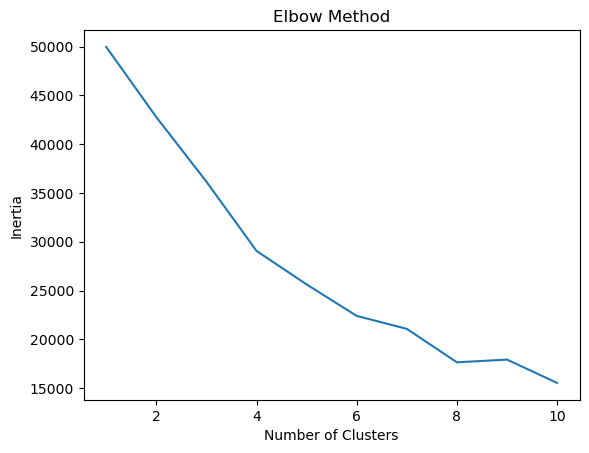

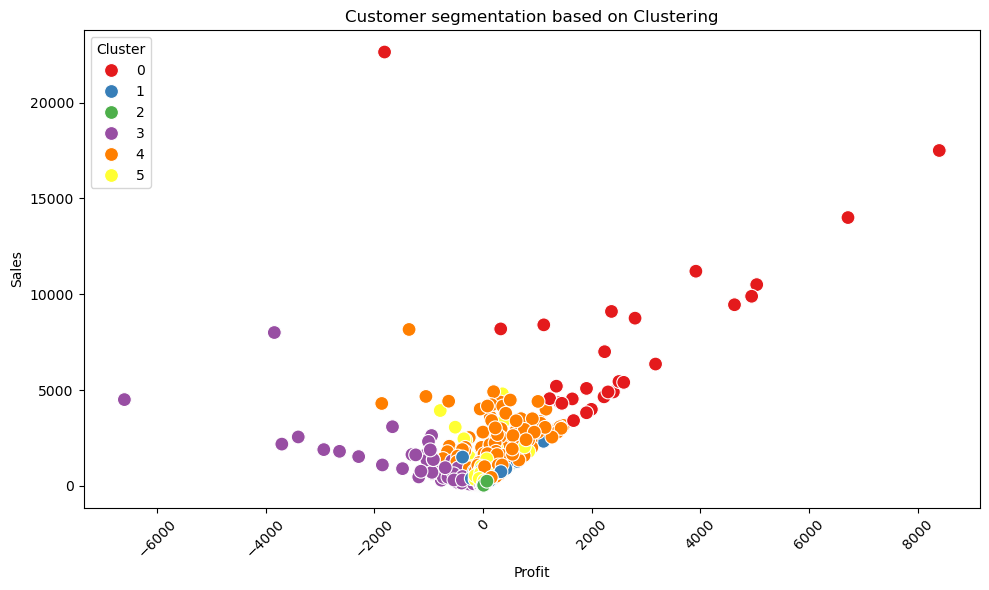

In [279]:
categorical_features = ['Ship Mode','Category','Customer ID','Region','Sub-Category']
df_encoded = pd.get_dummies(df[categorical_features], drop_first = True)

#scalue numerical features
scaler = StandardScaler()
numerical_features = ['Postal Code','Sales','Quantity','Discount','Profit'] #added purchase amount make clustering blur
df_scaled = scaler.fit_transform(df[numerical_features])

X = np.hstack((df_scaled, df_encoded.values))

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters)
df['Cluster'] = kmeans.fit_predict(X)


plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'Profit', y = 'Sales', hue = 'Cluster', palette = 'Set1', s = 100)
plt.title('Customer segmentation based on Clustering')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.xticks(rotation = 45)
plt.legend(title = 'Cluster')
plt.tight_layout()
plt.show()


In [ ]:
#machine learning 

In [305]:
from sklearn.preprocessing import LabelEncoder

ml = df.drop(columns = ['Order ID', 'Order Date','Ship Date','Customer ID','Product ID','year_month'], axis = 1)
categorial_feature = ['Ship Mode','Segment','Region','Category','Sub-Category']	

encoder = LabelEncoder()

for col in categorial_feature:
    ml[col] = encoder.fit_transform(ml[col])
ml.head()

,Ship Mode,Segment,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,year,month,order_to_ship,Profit Margin,profit_margin_before_discount,Cluster,cluster
0,2,0,42420.0,2,0,4,261.9600,2.0,0.00,41.9136,2013,11,3,0.1600,41.913600,1,3
1,2,0,42420.0,2,0,5,731.9400,3.0,0.00,219.5820,2013,11,3,0.3000,219.582000,1,3
2,2,1,90036.0,3,1,10,14.6200,2.0,0.00,6.8714,2013,6,4,0.4700,6.871400,2,1
3,3,0,33311.0,2,0,16,957.5775,5.0,0.45,-383.0310,2012,10,7,-0.4000,47.878875,3,4
4,3,0,33311.0,2,1,14,22.3680,2.0,0.20,2.5164,2012,10,7,0.1125,6.990000,1,3


<>:7: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\['
C:\Users\hosin\AppData\Local\Temp\ipykernel_1140\3917644309.py:7: SyntaxWarning: invalid escape sequence '\['
  '''


                               Ship Mode   Segment  Postal Code    Region  \
Ship Mode                       1.000000 -0.004527    -0.004068 -0.023809   
Segment                        -0.004527  1.000000    -0.010772 -0.005560   
Postal Code                    -0.004068 -0.010772     1.000000  0.474774   
Region                         -0.023809 -0.005560     0.474774  1.000000   
Category                       -0.004129  0.010123    -0.002331 -0.005148   
Sub-Category                   -0.003275  0.010943    -0.003788  0.009112   
Sales                          -0.001887  0.010866    -0.023854  0.004216   
Quantity                        0.022440  0.008130     0.012761  0.013506   
Discount                       -0.000436 -0.016679     0.058443 -0.212769   
year                           -0.040368  0.040480     0.004539 -0.002902   
month                          -0.011908 -0.022796     0.024627  0.027258   
order_to_ship                   0.720480  0.001491    -0.010184 -0.020375   

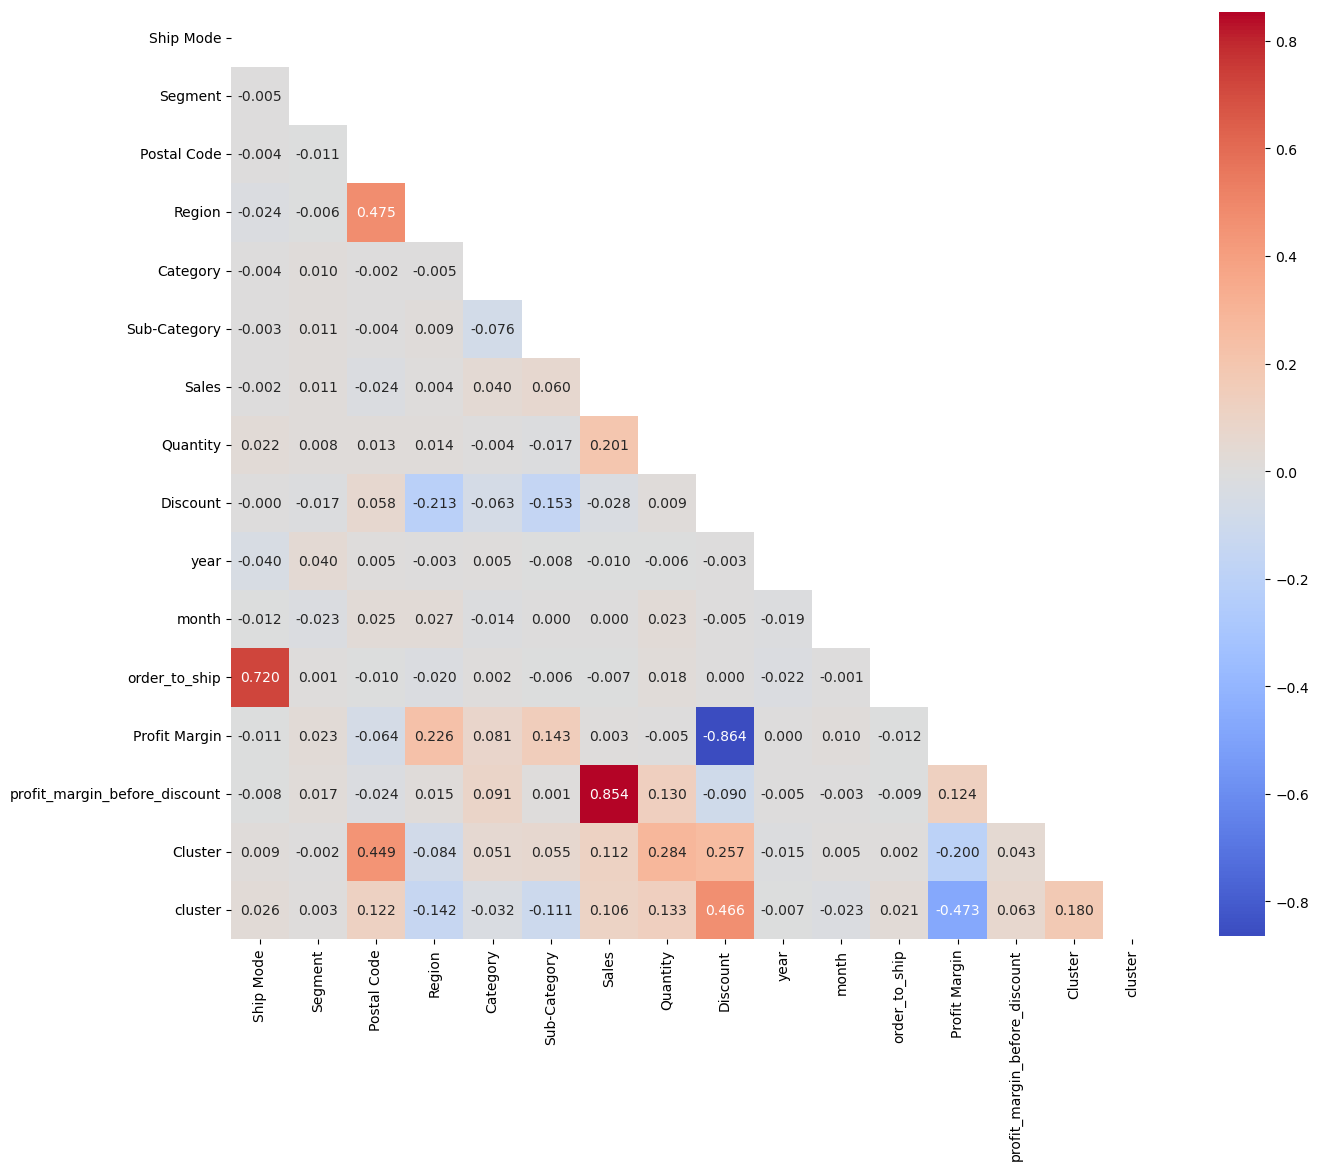

" \nwhy profit will cause milticollinearity and why it should be dropped:\nIn your dataset, the `Profit` column may not directly cause multicollinearity in the same way that independent variables do, but it can still be problematic in a regression context due to its relationship with other variables, particularly `Sales`, `Quantity`, and `Discount`. Here’s why you might consider this:\n\n### Reasons for Considering Profit in Multicollinearity\n\n1. **Derived Variable**: Profit can often be derived from other variables in your dataset. For example:\n   \\[\n   \text{Profit} = \text{Sales} - \text{Cost}\n   \\]\n   If you have `Sales` and other cost-related metrics, including `Profit` can lead to redundancy, as it essentially represents information already captured by `Sales` and other variables.\n\n2. **Correlation with Other Variables**: Profit is likely to be highly correlated with `Sales`, `Quantity`, and possibly `Discount`. High correlation can lead to multicollinearity, making it 

In [309]:
ml_corr = ml.drop(['Profit'], axis=1).corr()
print(ml_corr)

plt.figure(figsize = (15,15))
sns.heatmap(ml_corr, annot = True, fmt = '.3f',  cmap='coolwarm', mask = np.triu(np.ones_like(ml_corr, dtype=bool)),square=True, cbar_kws={"shrink": .8})
plt.show()


In [311]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [313]:

X = ml.drop(["Profit"], axis = 1)
y = ml["Profit"]

# Check the final size of groups for testing and training
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# View the final size of the groups
x_train_shape = X_train.shape
x_test_shape = X_test.shape

print("X_train shape = {}\nX_test shape = {}".format(x_train_shape, x_test_shape))


X_train.columns = X_train.columns.astype(str).str.strip()
X_test.columns = X_test.columns.astype(str).str.strip() #machine learning requires all column names to be string 

#ensure all colums are numerical 
num_features = X_train.select_dtypes(include = ['int64', 'float64']).columns.tolist()

#define preprocessor
preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(), num_features)], remainder = 'passthrough')

#list of model to evaluate 
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor' :RandomForestRegressor(),
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42)
}

for model_name, model in models.items():
    pipeline = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressors', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    #training result 
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    #testing result 
    r2_test= r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)

     # Print metrics
    print(f"\033[1mMETRICS FOR {model_name}:\033[0m")
    print("TRAINING DATA:")
    print("R2:", round(r2_train, 4))
    print("Mean Squared Error [MSE]:", mse_train)
    print("Root Mean Squared Error [RMSE]:", rmse_train)
    print("Mean Absolute Error [MAE]:", mae_train)

    print("\nTEST DATA:")
    print("R2:", round(r2_test, 4))
    print("Mean Squared Error [MSE]:", mse_test)
    print("Root Mean Squared Error [RMSE]:", rmse_test)
    print("Mean Absolute Error [MAE]:", mae_test)
    print("\n" + "="*50 + "\n")

X shape :  (9994, 16)
y shape :  (9994,)
X_train shape = (6995, 16)
X_test shape = (2999, 16)
METRICS FOR LinearRegression:
TRAINING DATA:
R2: 0.8848
Mean Squared Error [MSE]: 6386.621307186313
Root Mean Squared Error [RMSE]: 79.91633942559126
Mean Absolute Error [MAE]: 32.02559555025968

TEST DATA:
R2: 0.2534
Mean Squared Error [MSE]: 39956.79237615621
Root Mean Squared Error [RMSE]: 199.89195175433204
Mean Absolute Error [MAE]: 38.354753455049334


METRICS FOR RandomForestRegressor:
TRAINING DATA:
R2: 0.9833
Mean Squared Error [MSE]: 927.2110934587462
Root Mean Squared Error [RMSE]: 30.45014110737003
Mean Absolute Error [MAE]: 2.0706293353824132

TEST DATA:
R2: 0.4168
Mean Squared Error [MSE]: 31212.36618556997
Root Mean Squared Error [RMSE]: 176.67021872848284
Mean Absolute Error [MAE]: 9.59823684761588


METRICS FOR HistGradientBoostingRegressor:
TRAINING DATA:
R2: 0.7435
Mean Squared Error [MSE]: 14224.916619853022
Root Mean Squared Error [RMSE]: 119.2682548704936
Mean Absolute Er

In [ ]:
plt.figure(figsize = (15,12))

for model_name, model in models.items():
    # Fit the model and predict
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred_test = pipeline.predict(X_test)

    # DataFrame for actual vs predicted
    results_df = pd.DataFrame({'Actual Profit': y_test, 'Predicted Profit': y_pred_test})

    # Scatter plot for the current model
    sns.scatterplot(data=results_df, x='Actual Profit', y='Predicted Profit', alpha=0.5, label=model_name)

    # Reference line for perfect predictions
    plt.plot([results_df['Actual Profit'].min(), results_df['Actual Profit'].max()],
             [results_df['Actual Profit'].min(), results_df['Actual Profit'].max()],
             color='red', linestyle='--', label='Perfect Prediction')

# Final plot settings
plt.title('Actual vs Predicted Profit for All Models')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.xlim(results_df['Actual Profit'].min(), results_df['Actual Profit'].max())
plt.ylim(results_df['Actual Profit'].min(), results_df['Actual Profit'].max())
plt.grid()
plt.legend()  # Add legend for clarity
plt.show()

results_df

,Actual Profit,Predicted Profit
3125,21.1428,27.376354
1441,11.4600,12.050488
4510,17.1580,16.316330
39,-15.1470,-20.744955
4509,-6.4233,-11.713650
...,...,...
9063,100.6850,110.008018
2603,5.1294,9.569934
6112,5.4444,5.719750
1579,89.3142,88.720093
